<a href="https://colab.research.google.com/github/Padmanaban55/Reference_Interval/blob/main/Oral_minimal_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Mount drive

from google.colab import drive
drive.mount('/content/drive')


In [ ]:
##Set working directory /content/drive/MyDrive/Oral_minimal_model

import os
os.chdir('/content/drive/MyDrive/Oral_minimal_model')


In [ ]:
##download the python folder from from https://github.com/manueich/VBA-OMM/tree/master/Python

!git clone https://github.com/manueich/VBA-OMM.git
!mv VBA-OMM/Python/* .

Cloning into 'VBA-OMM'...
remote: Enumerating objects: 294, done.
remote: Counting objects: 100% (294/294), done.
remote: Compressing objects: 100% (242/242), done.
remote: Total 294 (delta 98), reused 213 (delta 50), pack-reused 0 (from 0)
Receiving objects: 100% (294/294), 196.28 KiB | 1.29 MiB/s, done.
Resolving deltas: 100% (98/98), done.


In [18]:
#Read the csv files

import pandas as pd

df = pd.read_csv('ogtt_wide.csv')
df2 = pd.read_csv('min_mod_2.csv')


In [34]:
current_df2 = df2[df2['ID'] == "1_After"]
current_df2.iloc[0,2]
current_df2.iloc[0,4]

'obese'

1_Before
Model Inversion ...
DONE


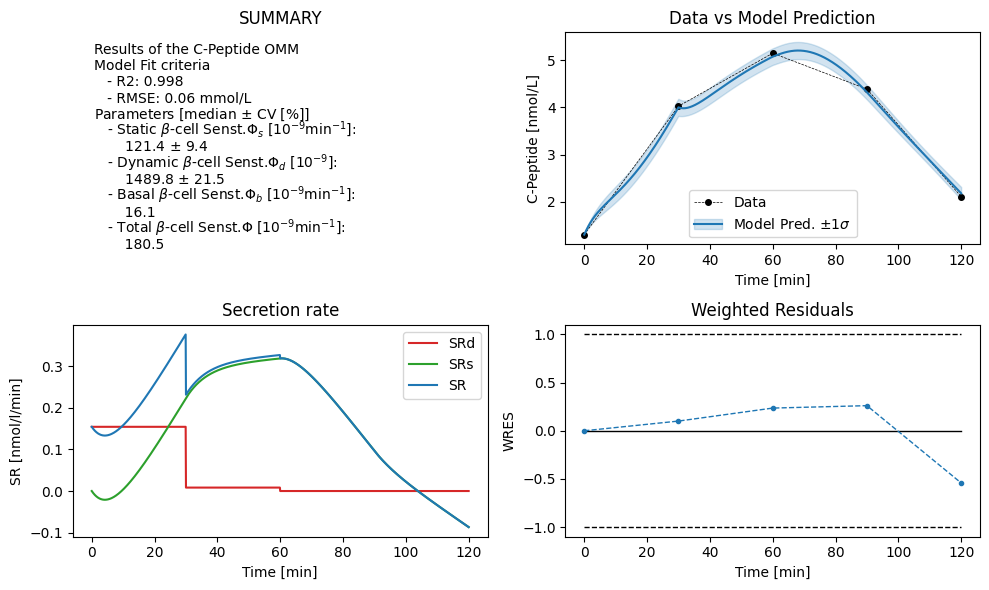

Model Inversion ...
DONE


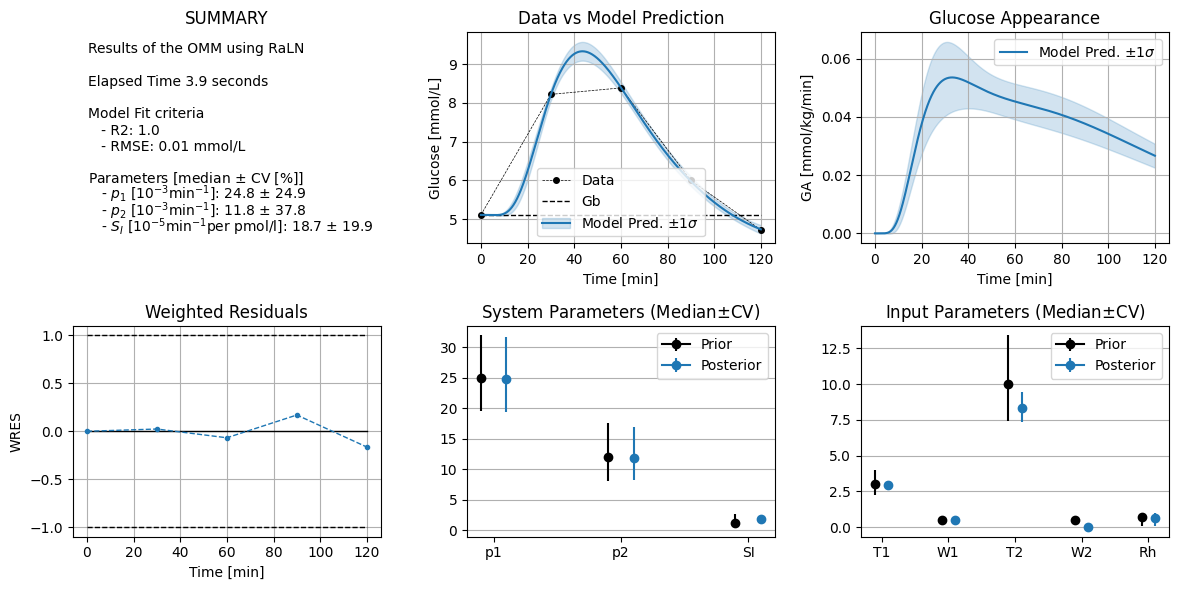

<ipython-input-39-5ab2e441eb6a>:143: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result = pd.concat([result, df_new_row], ignore_index=True)
<ipython-input-39-5ab2e441eb6a>:152: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  secretion = pd.concat([secretion, df_new_row], ignore_index=True)


2_Before
Model Inversion ...
DONE


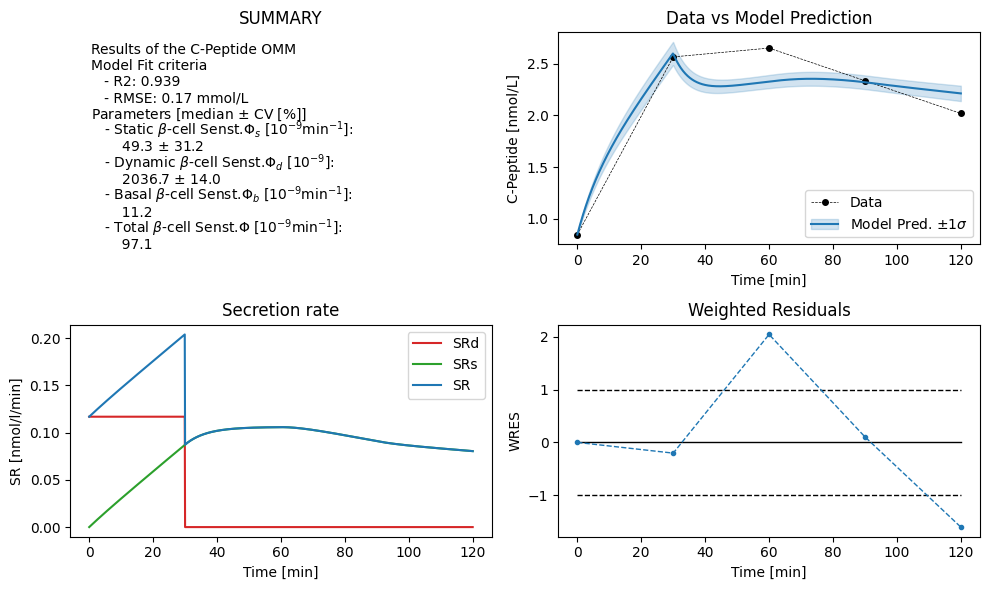

Model Inversion ...
DONE


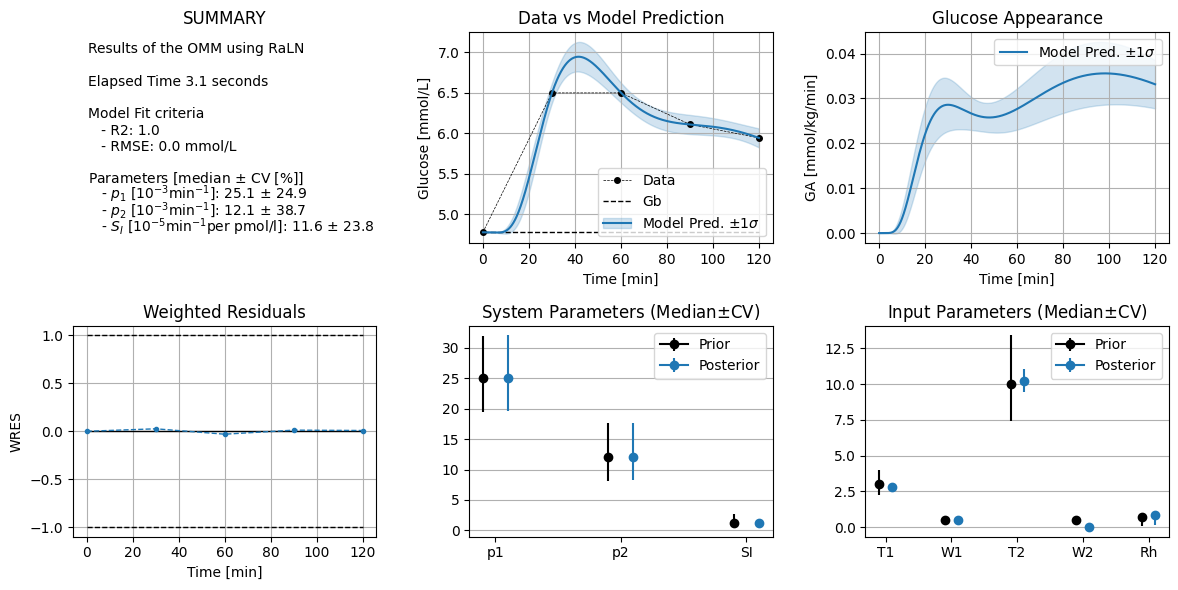

3_Before
Model Inversion ...
DONE


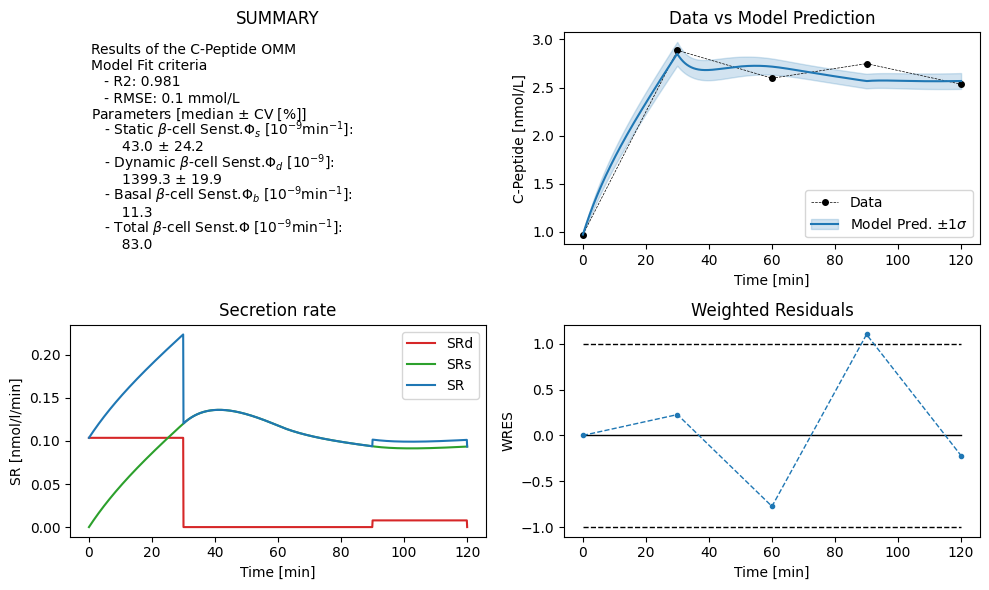

Model Inversion ...
DONE


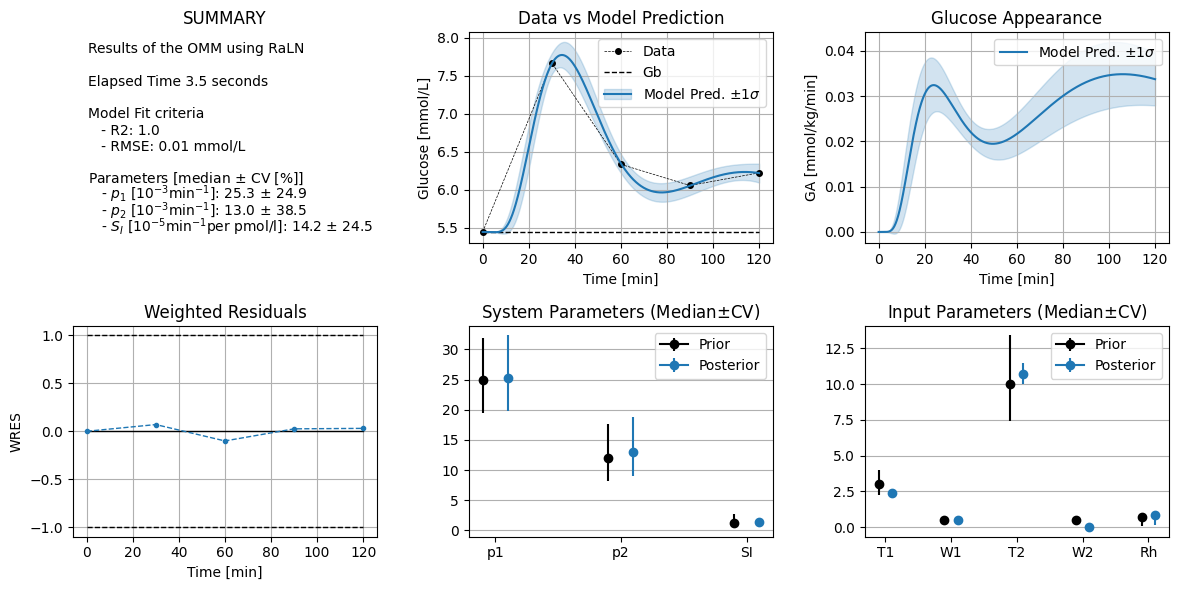

5_Before
Model Inversion ...
DONE


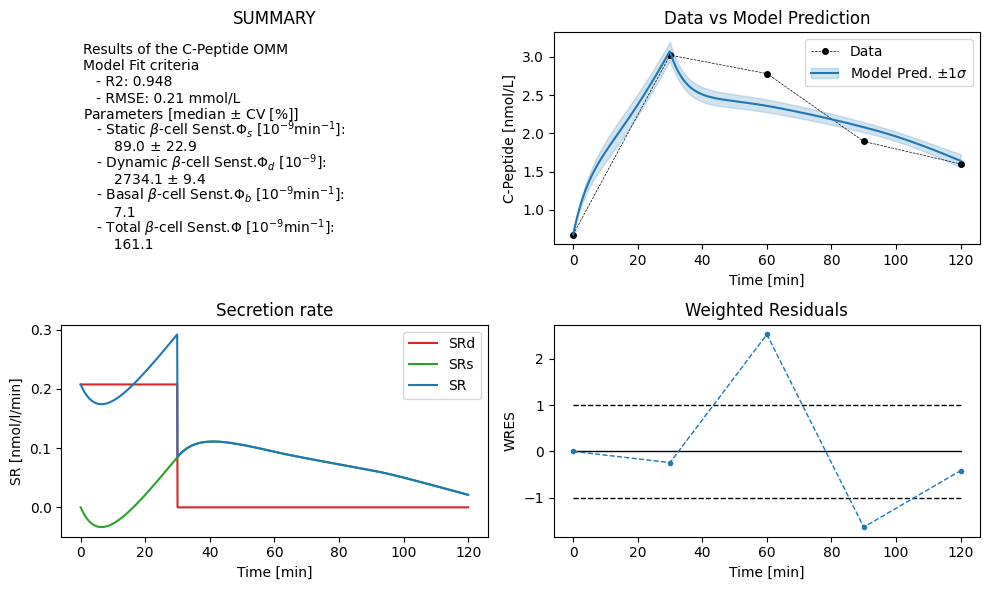

Model Inversion ...
DONE


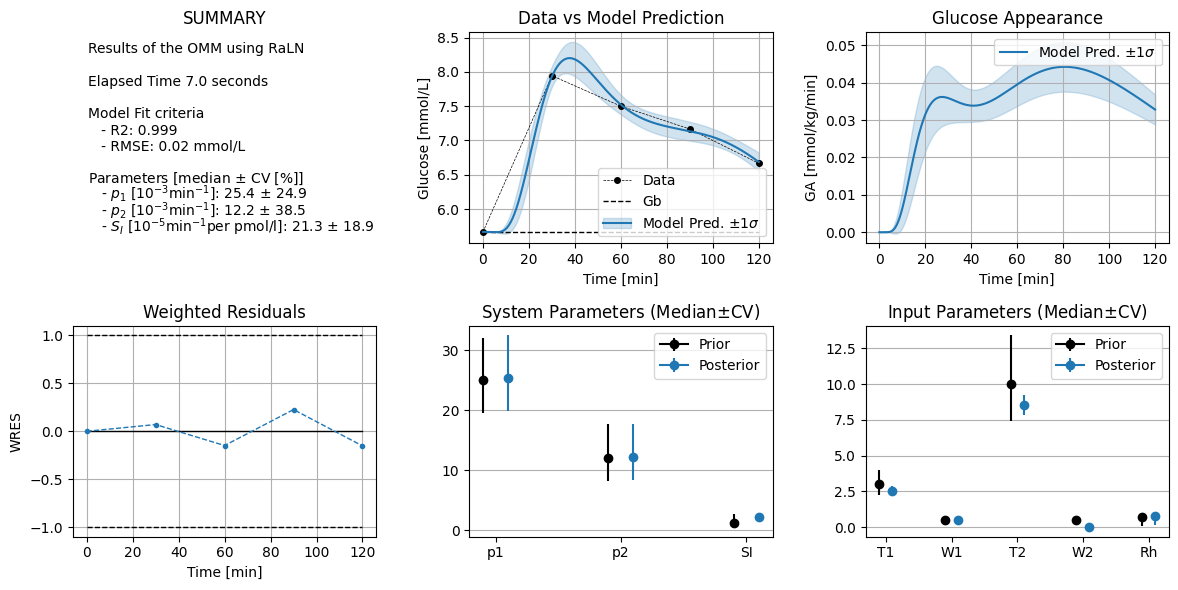

6_Before
Model Inversion ...
DONE


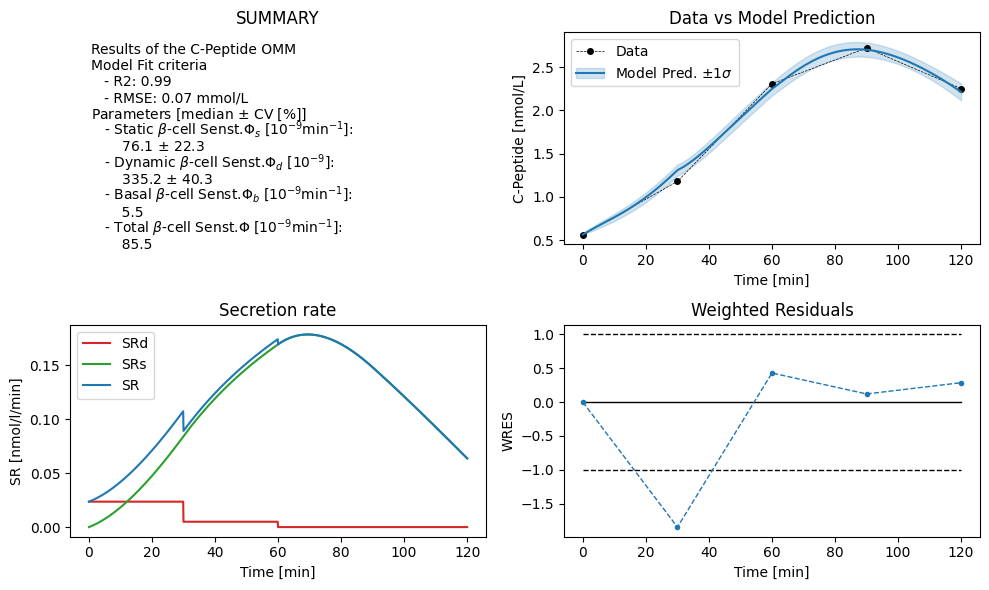

Model Inversion ...
DONE


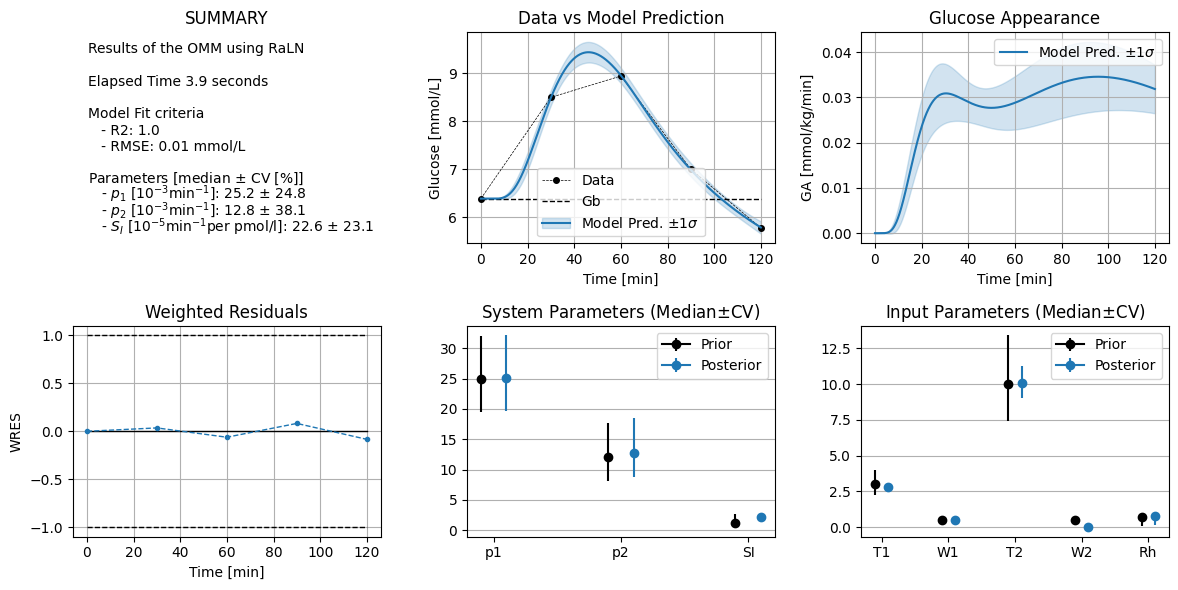

7_Before
Model Inversion ...
DONE


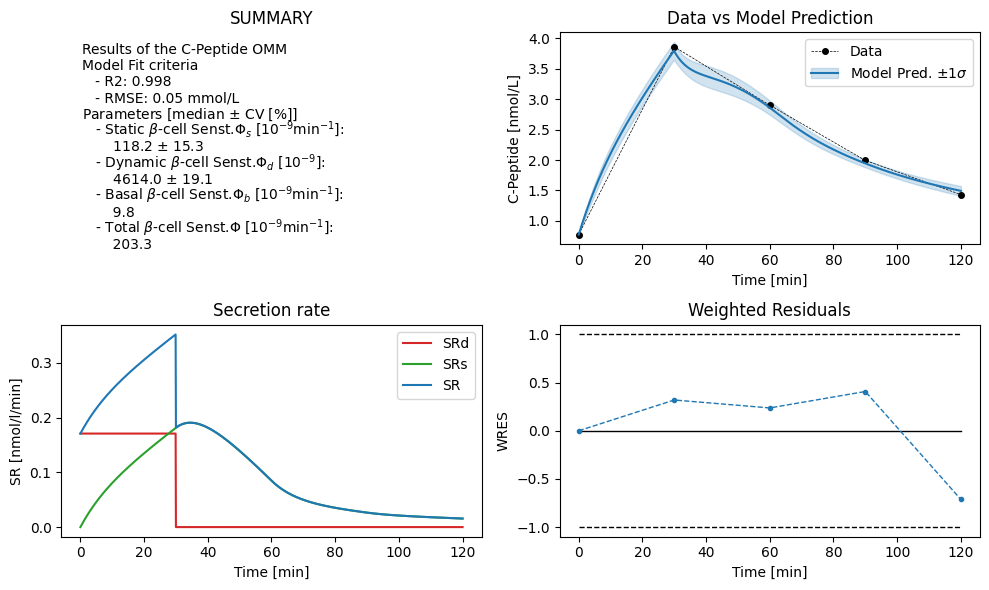

Model Inversion ...
DONE


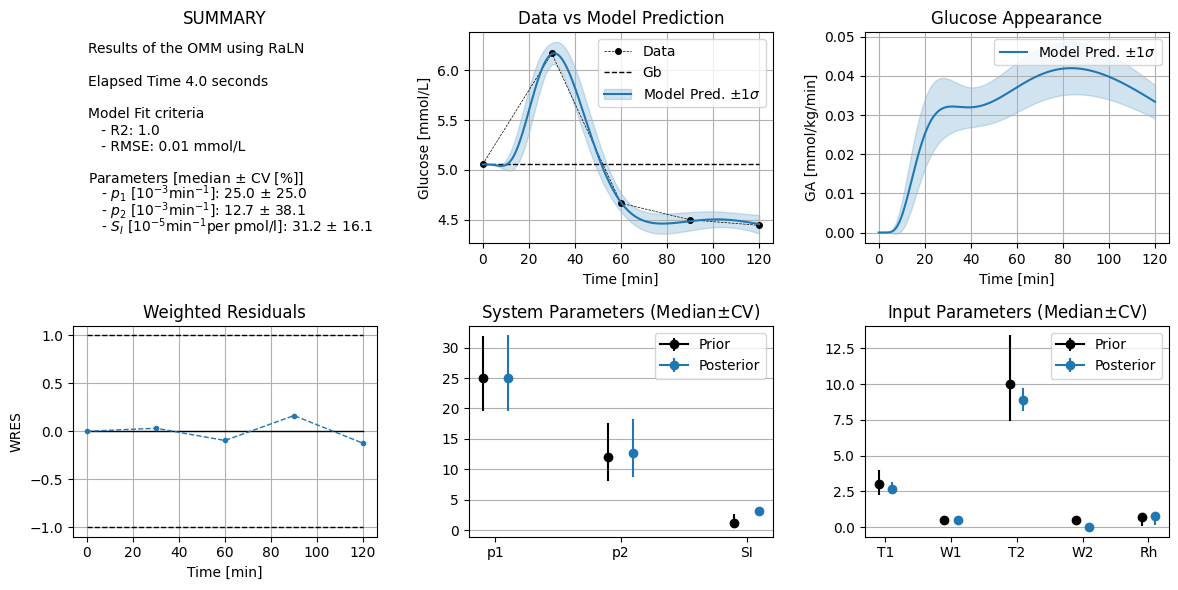

9_Before
Model Inversion ...
DONE


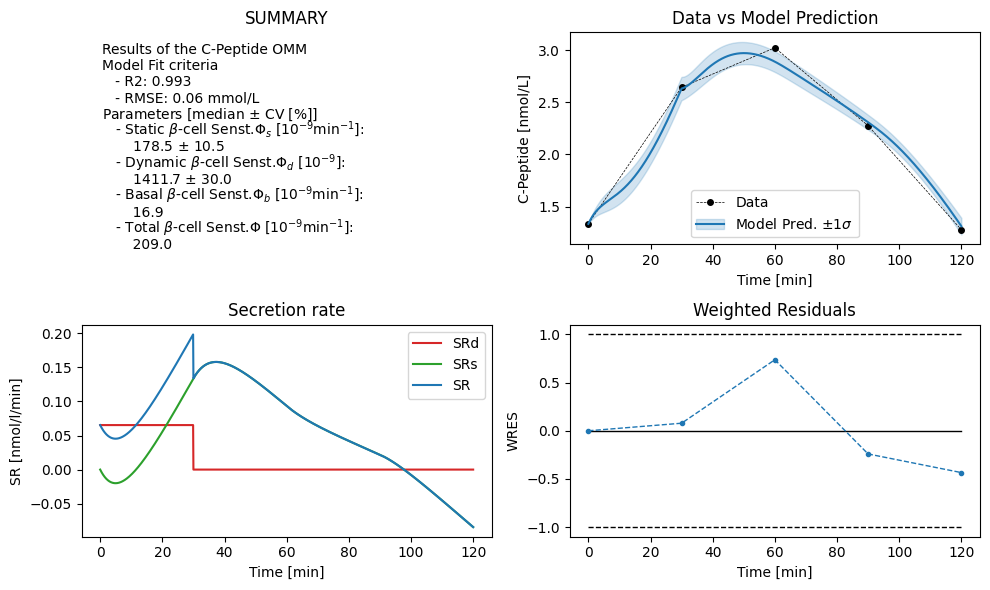

Model Inversion ...
DONE


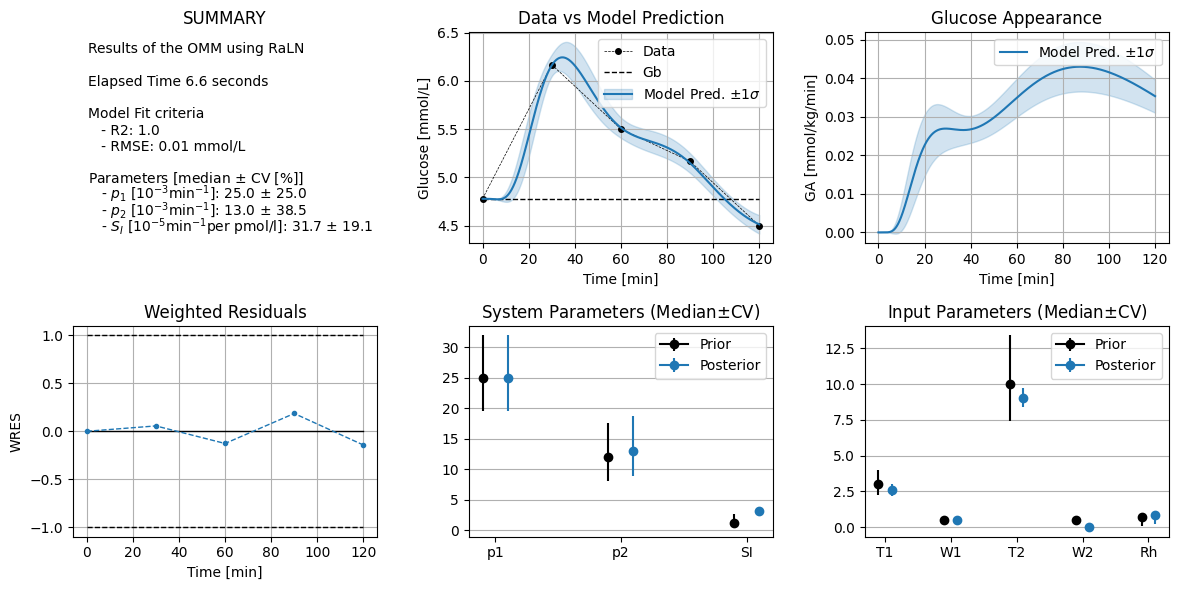

11_Before
Model Inversion ...
DONE


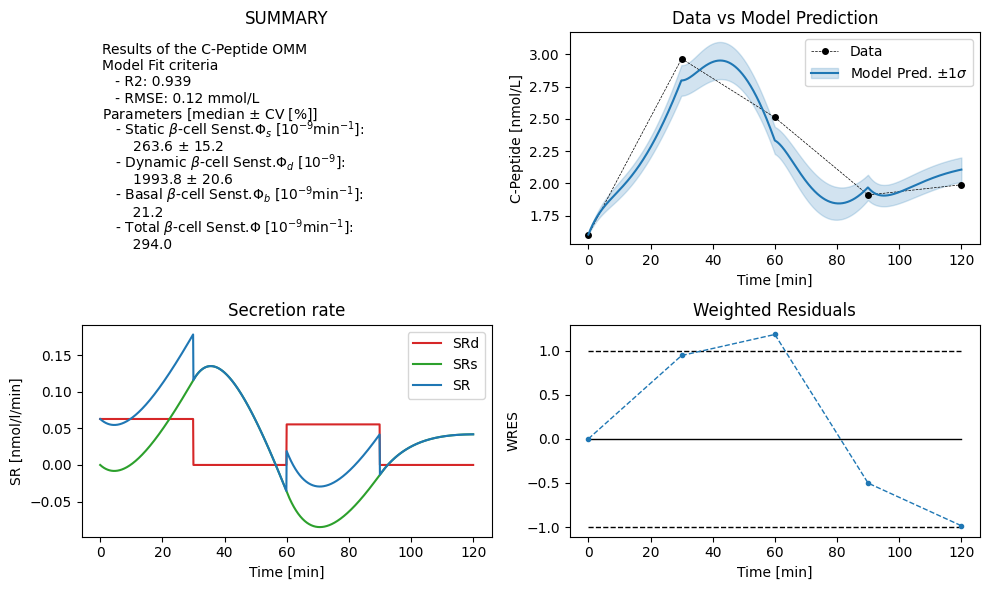

Model Inversion ...
DONE


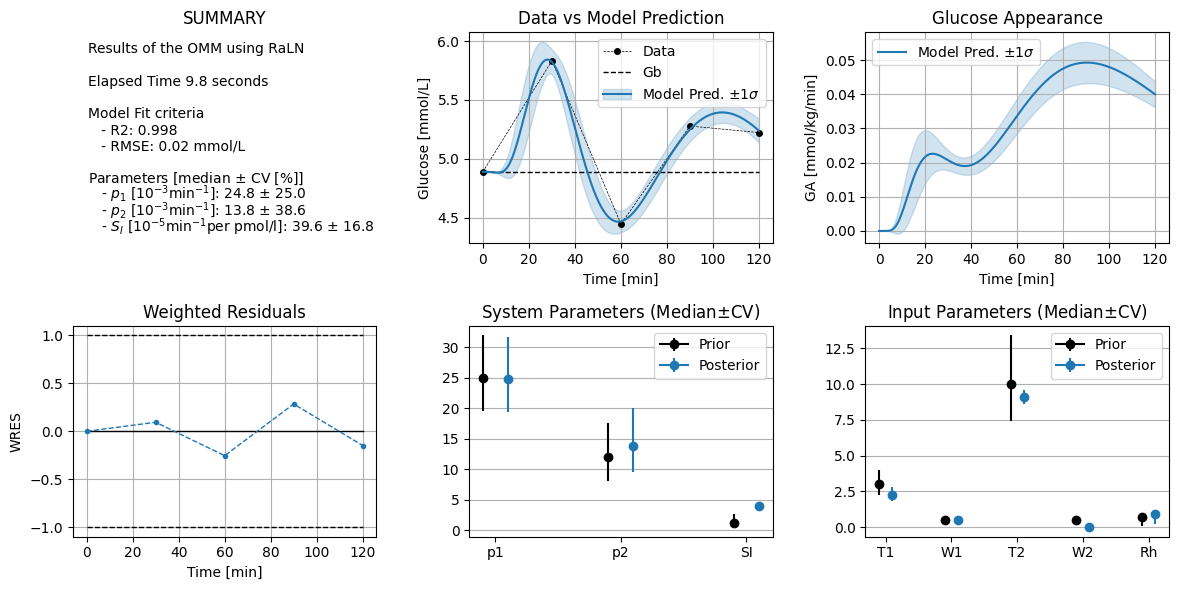

13_Before
Model Inversion ...
DONE


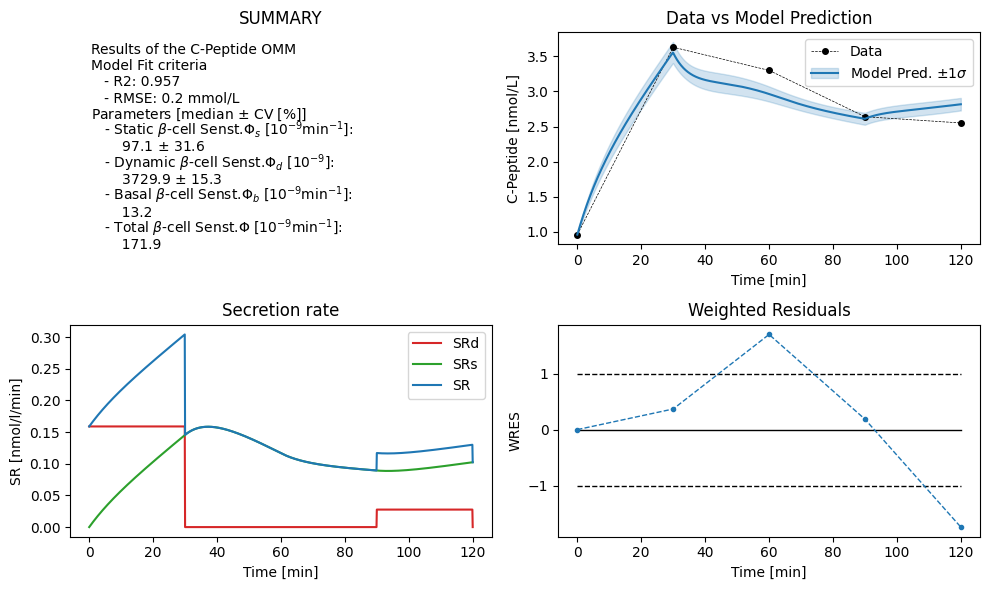

Model Inversion ...
DONE


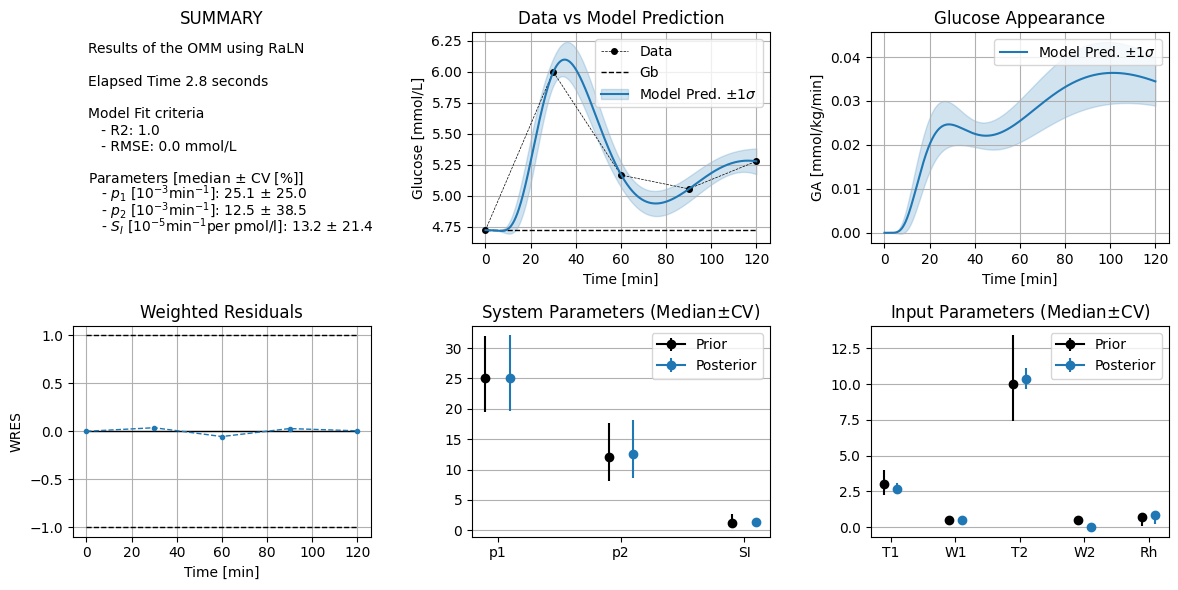

14_Before
Model Inversion ...
DONE


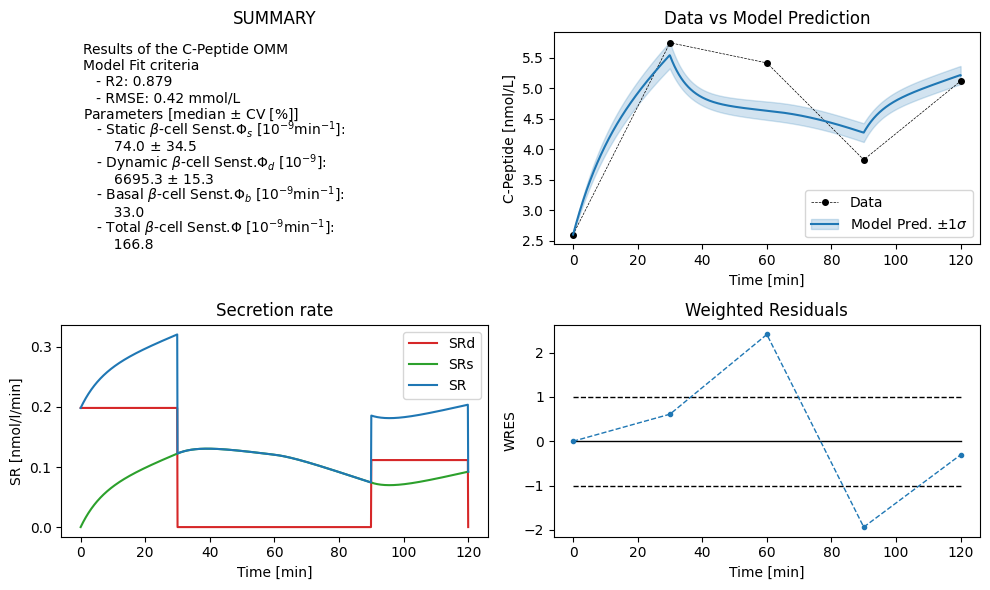

Model Inversion ...
DONE


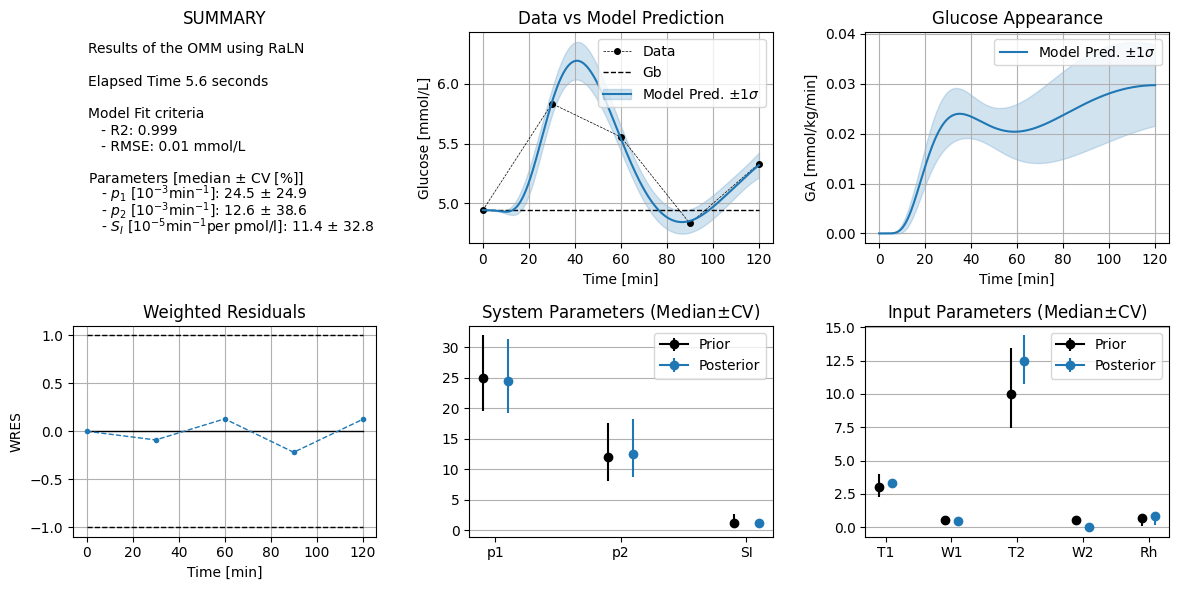

15_Before
Model Inversion ...
DONE


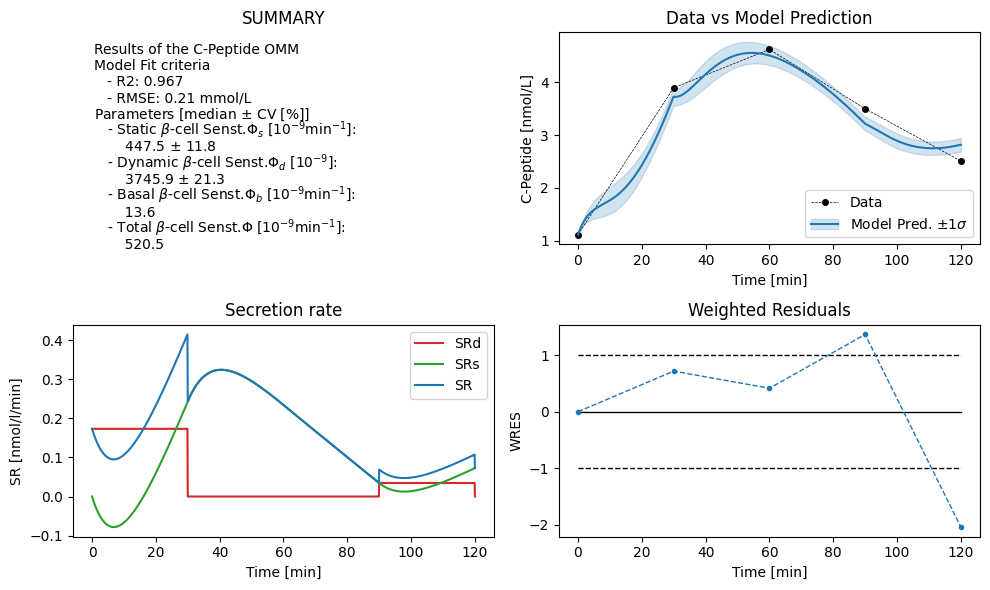

Model Inversion ...
DONE


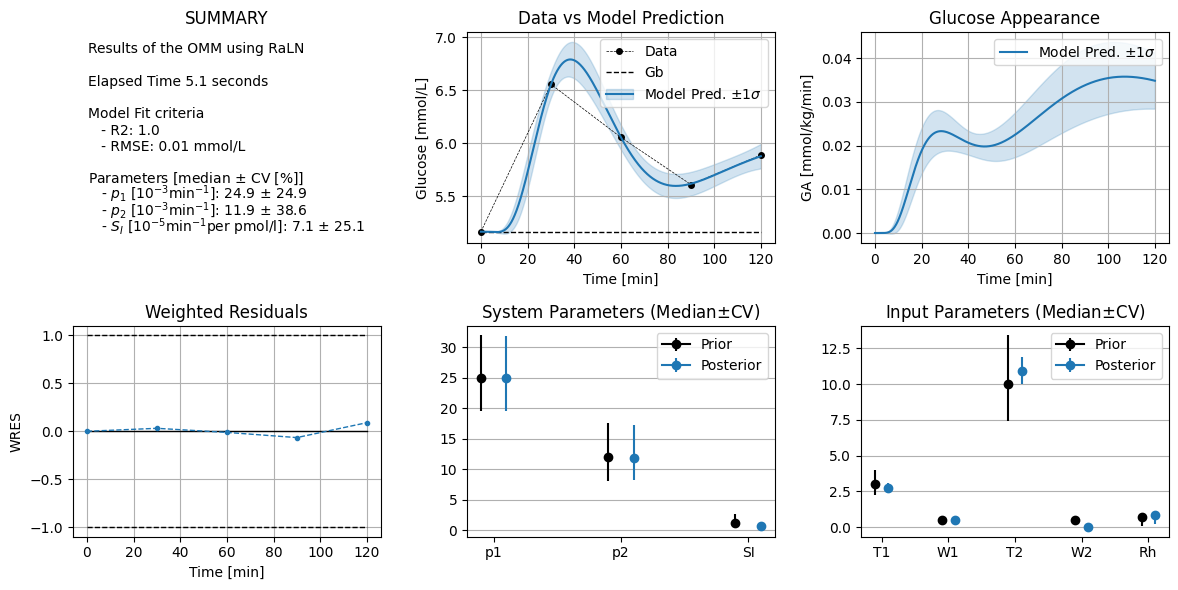

16_Before
Model Inversion ...
DONE


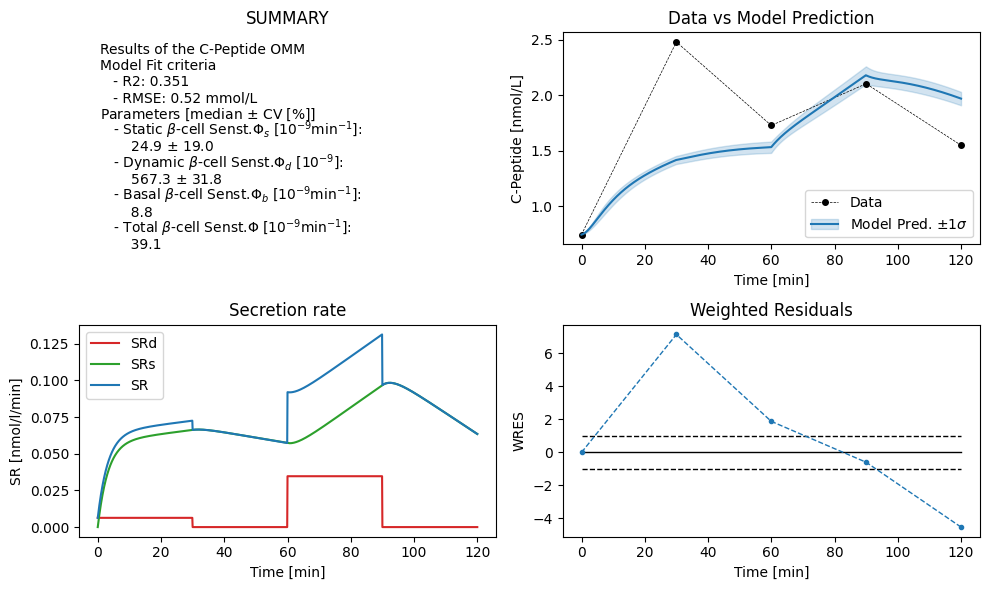

Model Inversion ...
DONE


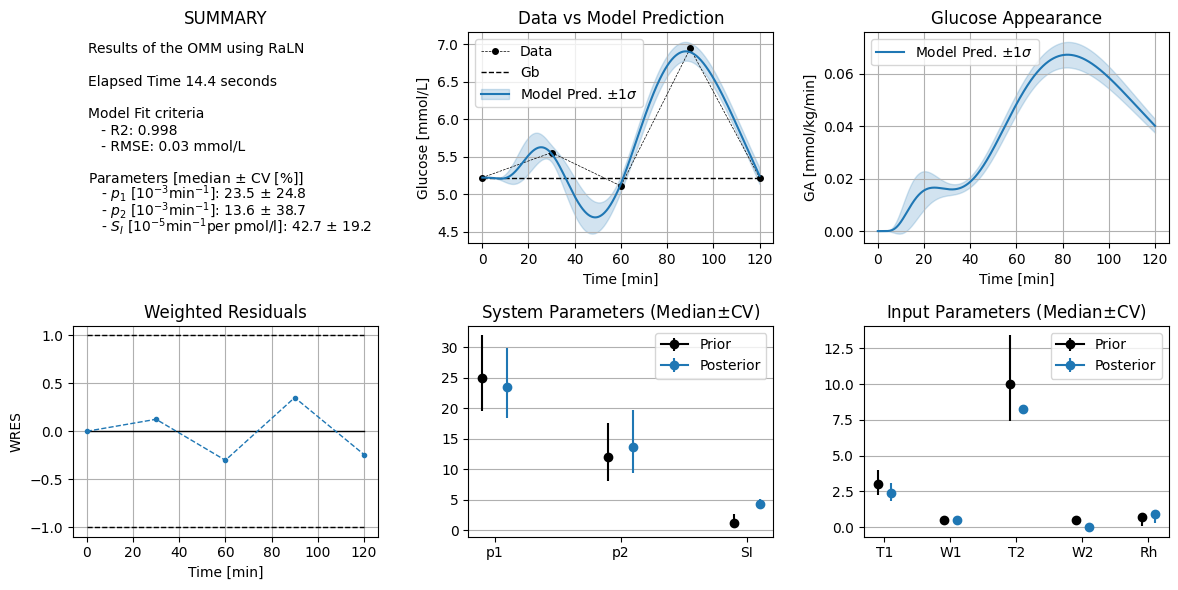

17_Before
Model Inversion ...
DONE


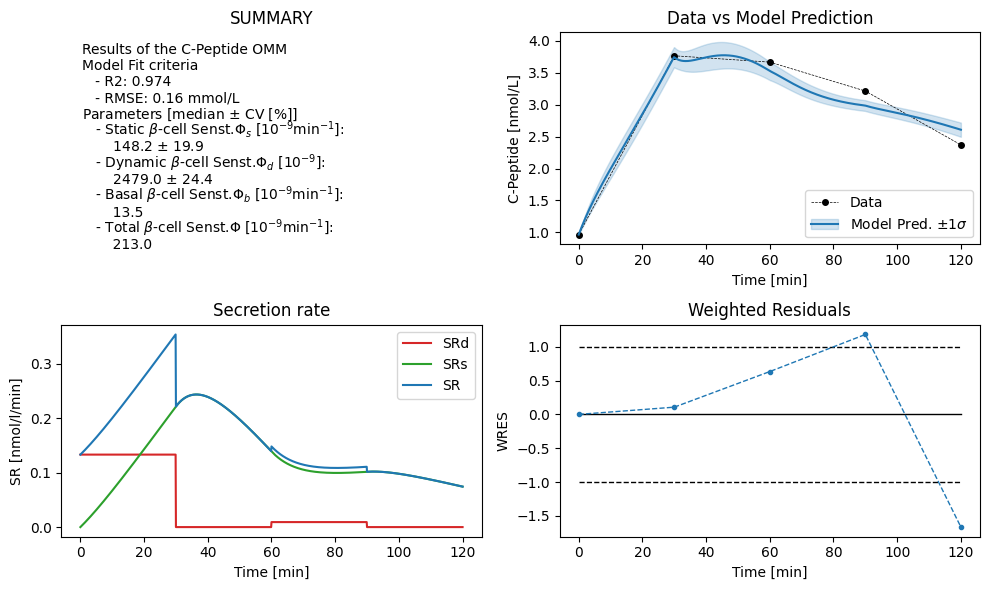

Model Inversion ...
DONE


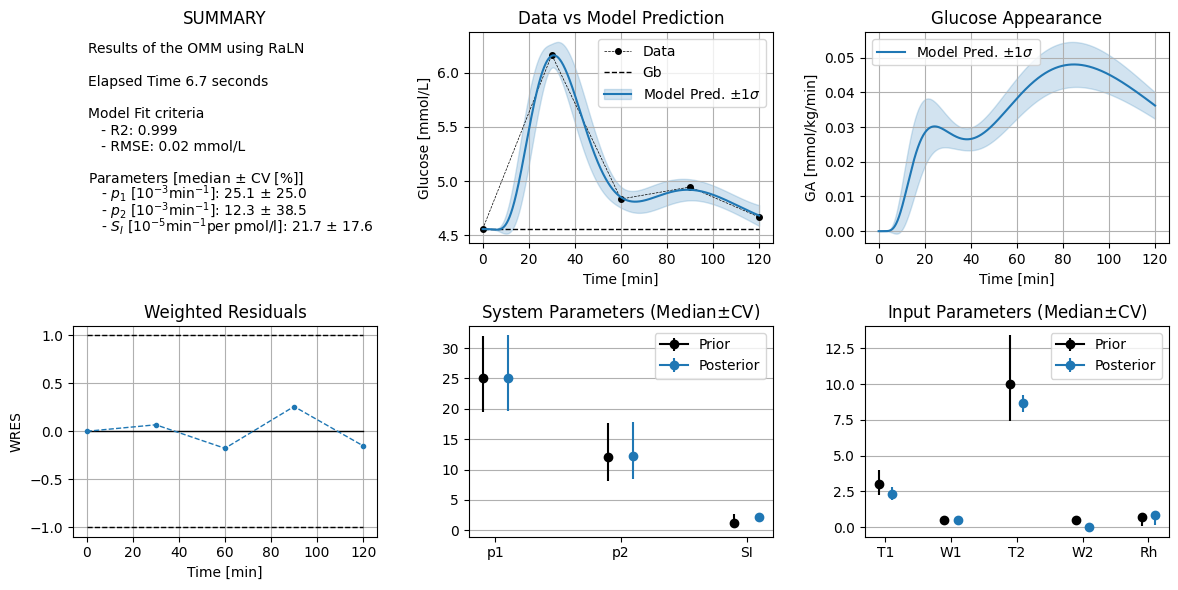

18_Before
Model Inversion ...
DONE


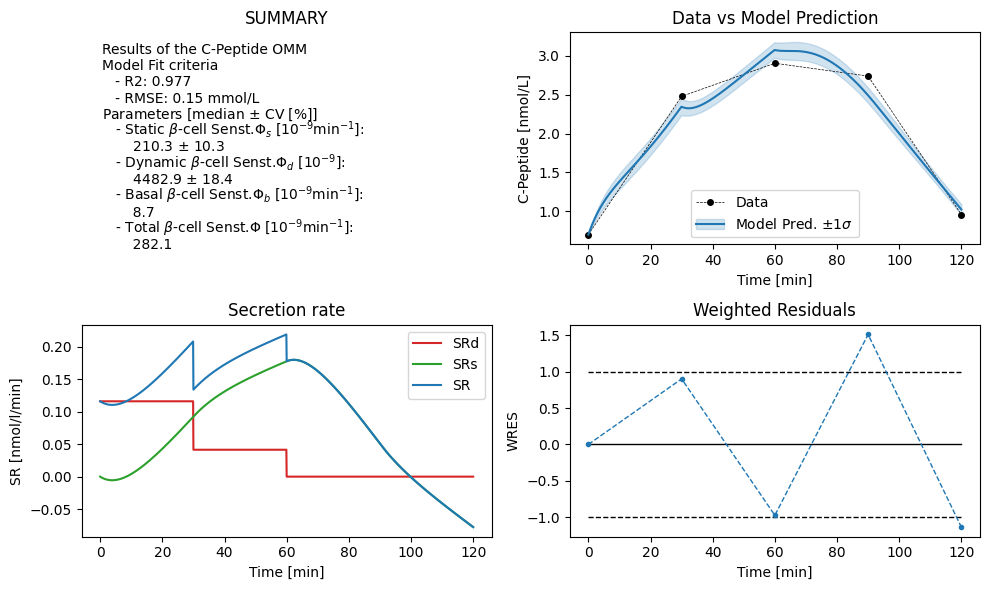

Model Inversion ...
DONE


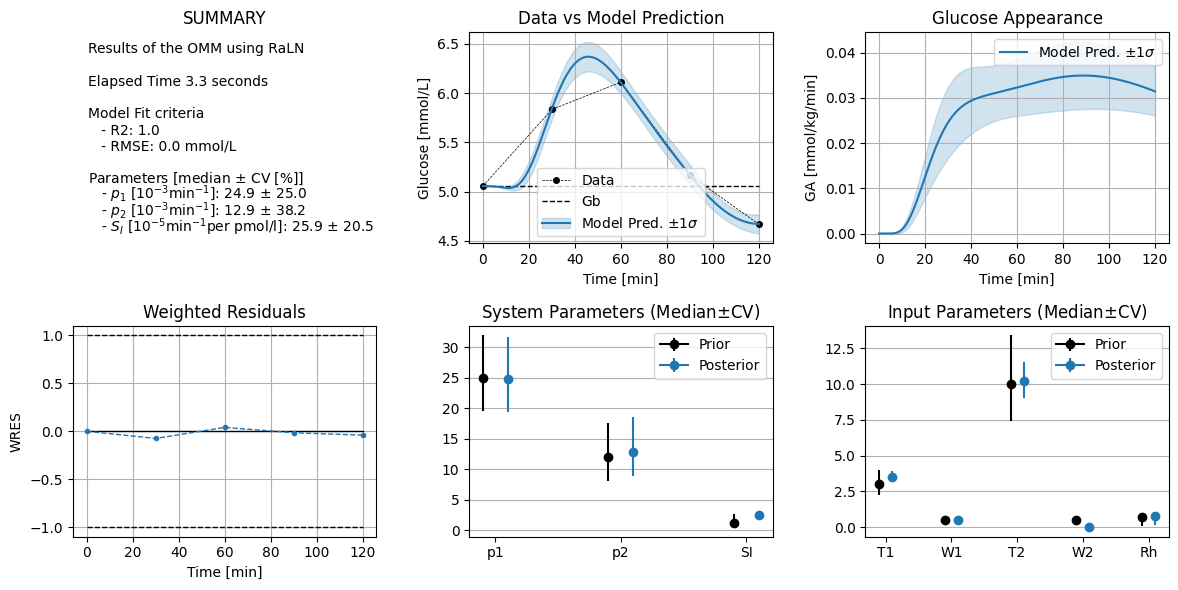

19_Before
Model Inversion ...
DONE


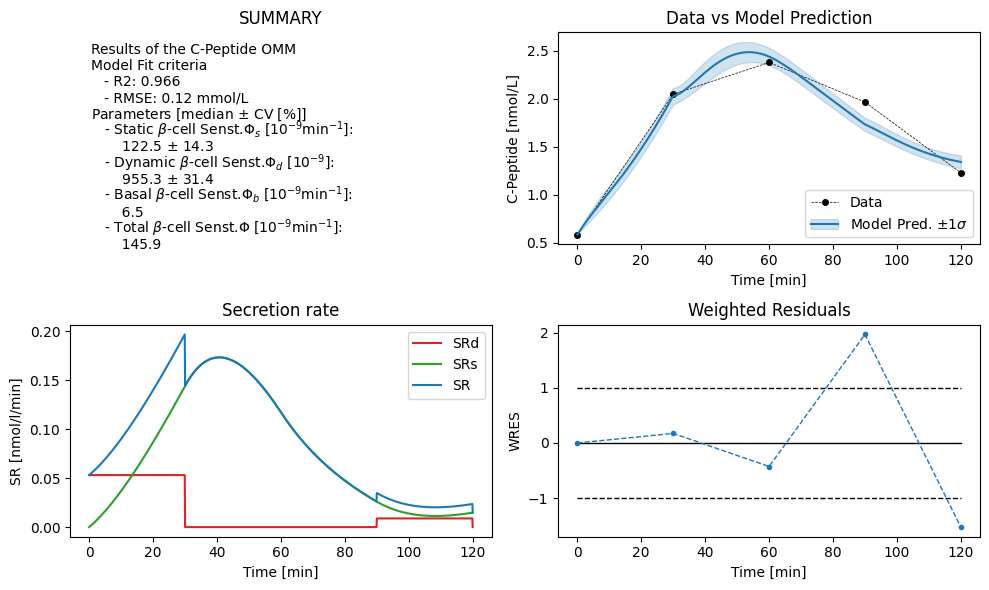

Model Inversion ...
DONE


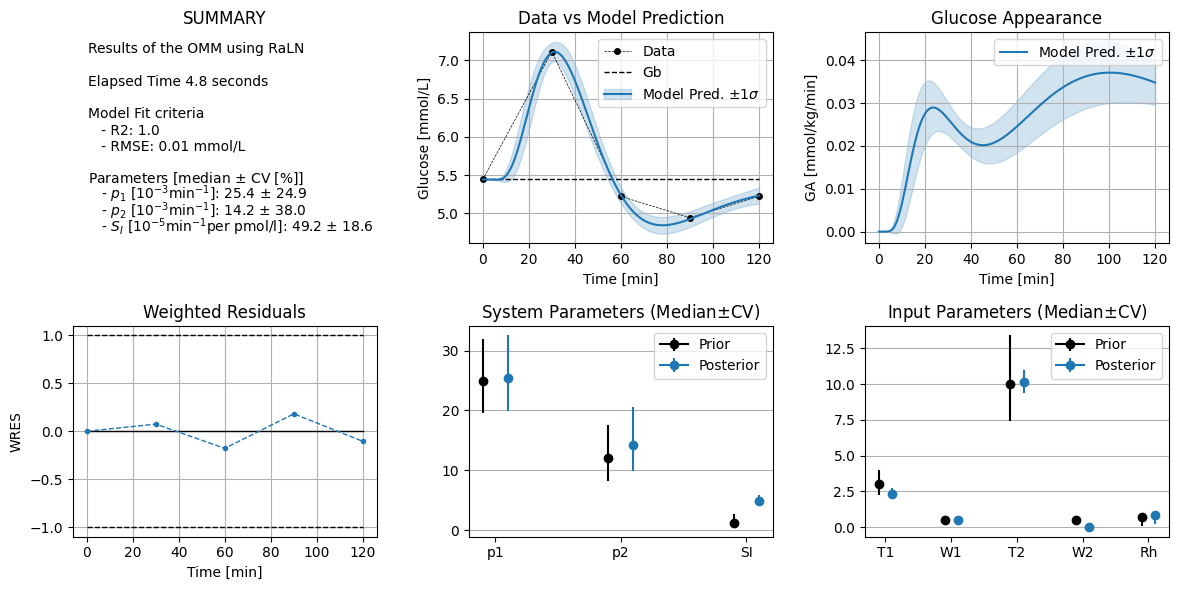

1_After
Model Inversion ...
DONE


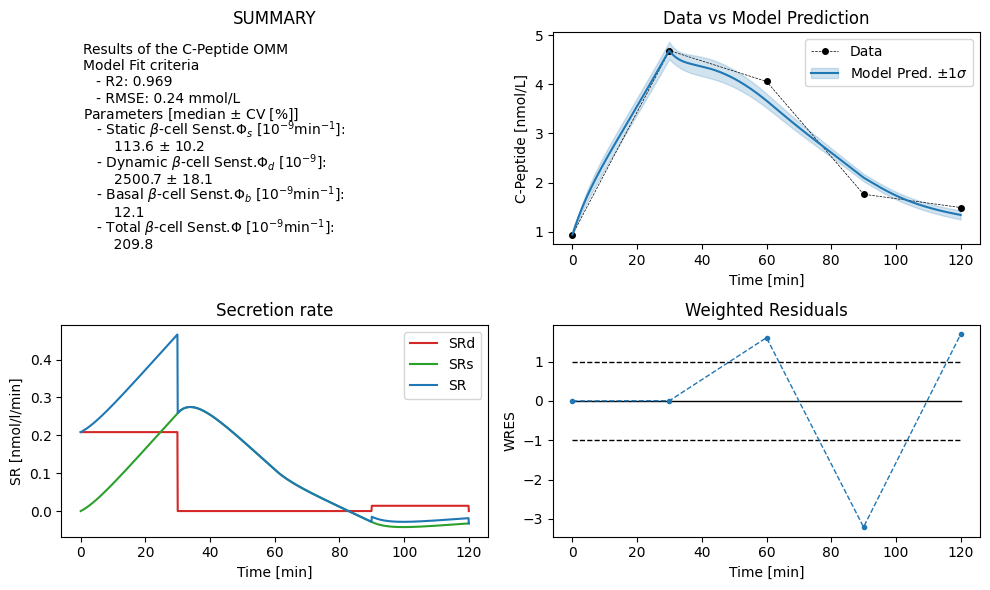

Model Inversion ...
DONE


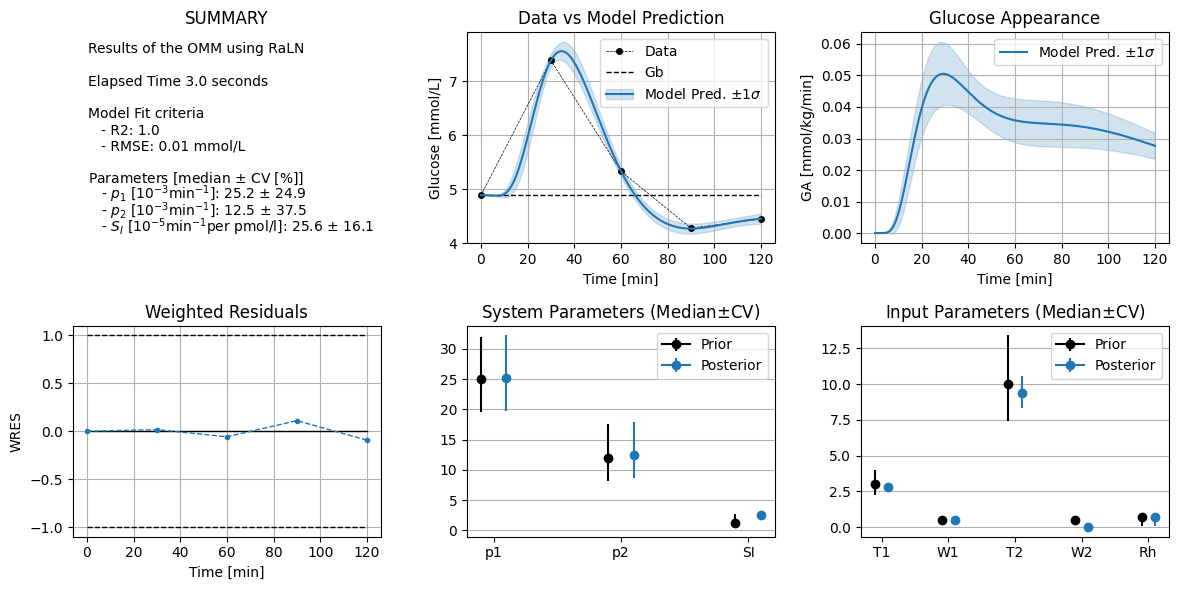

2_After
Model Inversion ...
DONE


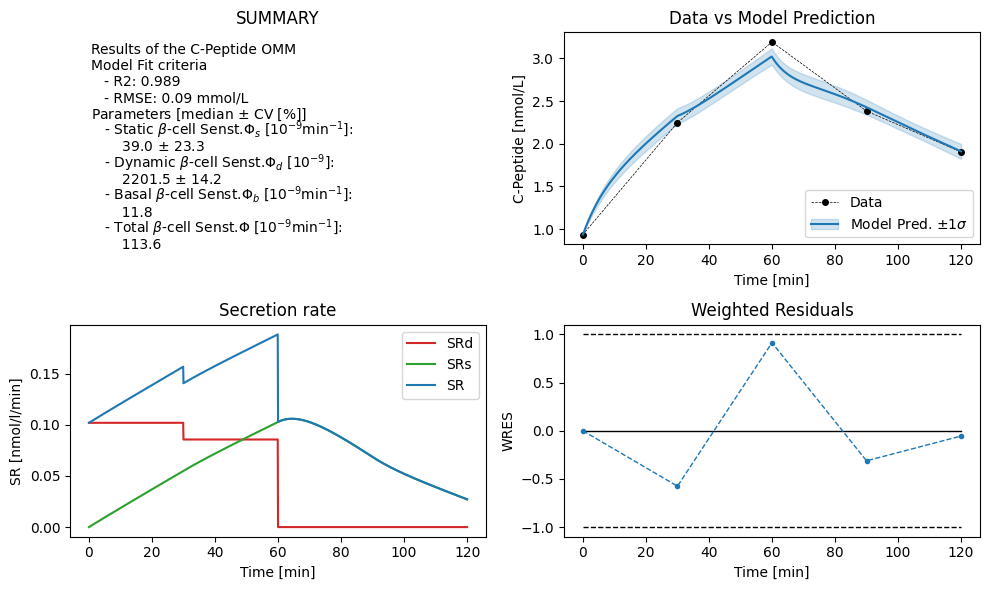

Model Inversion ...
DONE


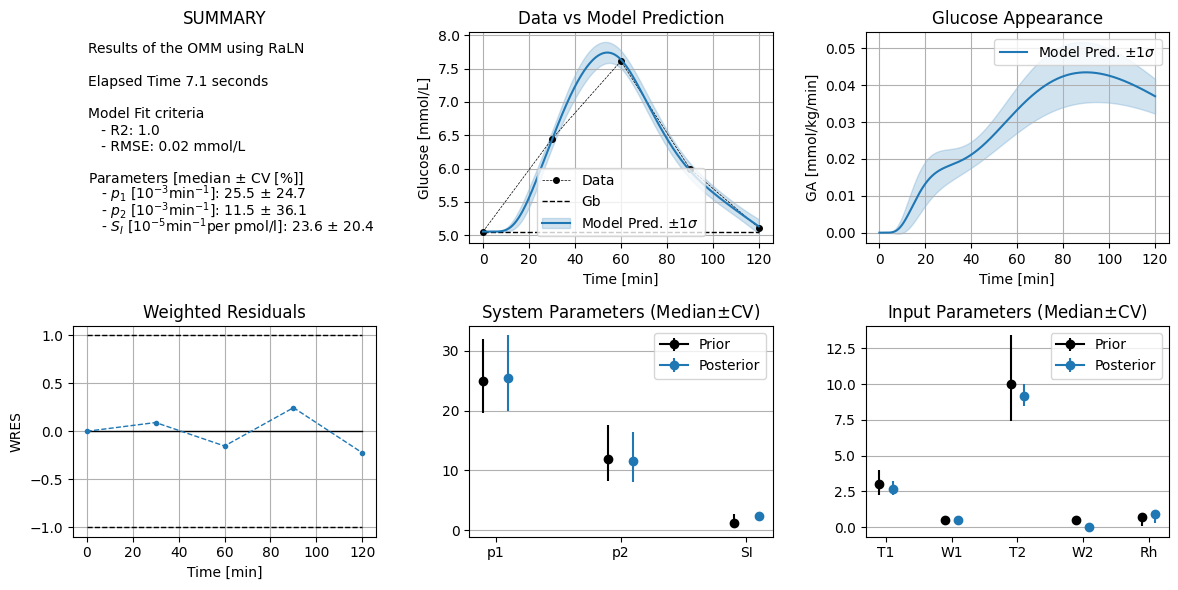

3_After
Model Inversion ...
DONE


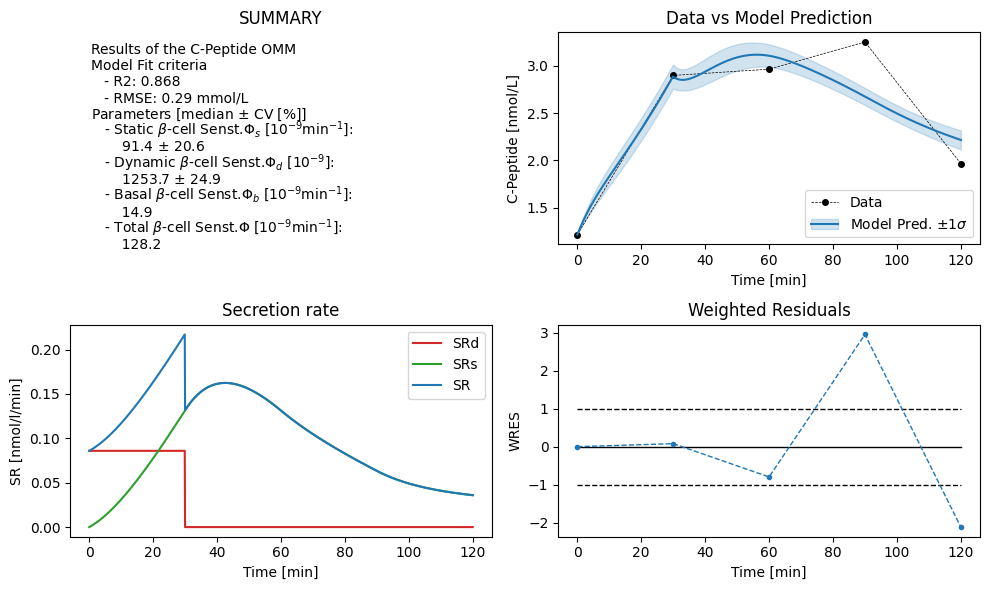

Model Inversion ...
DONE


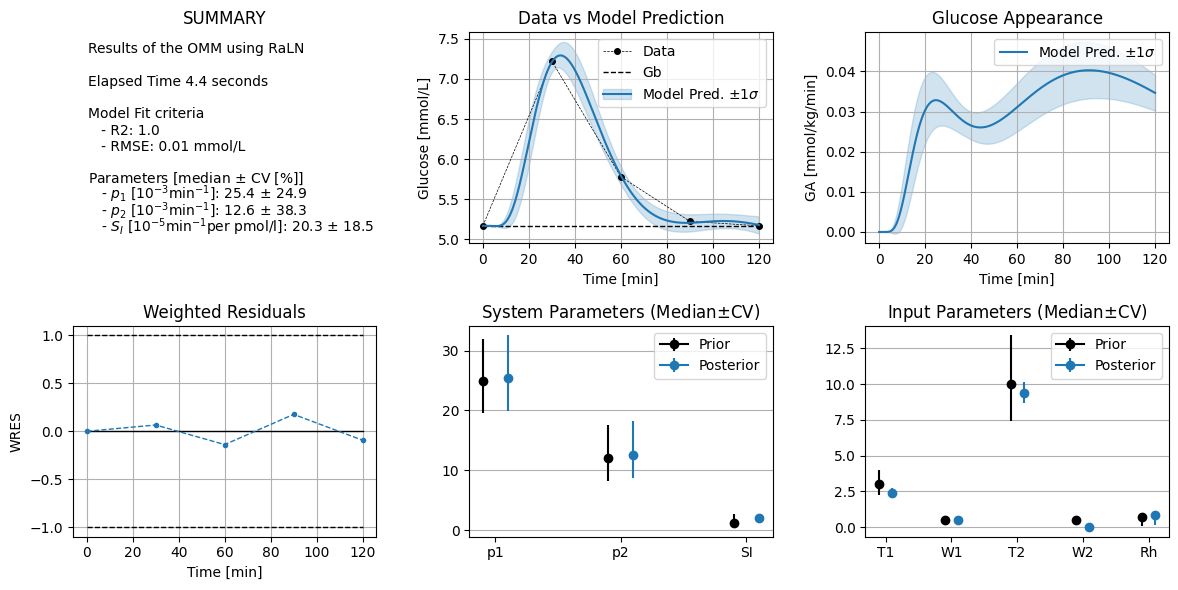

5_After
Model Inversion ...
DONE


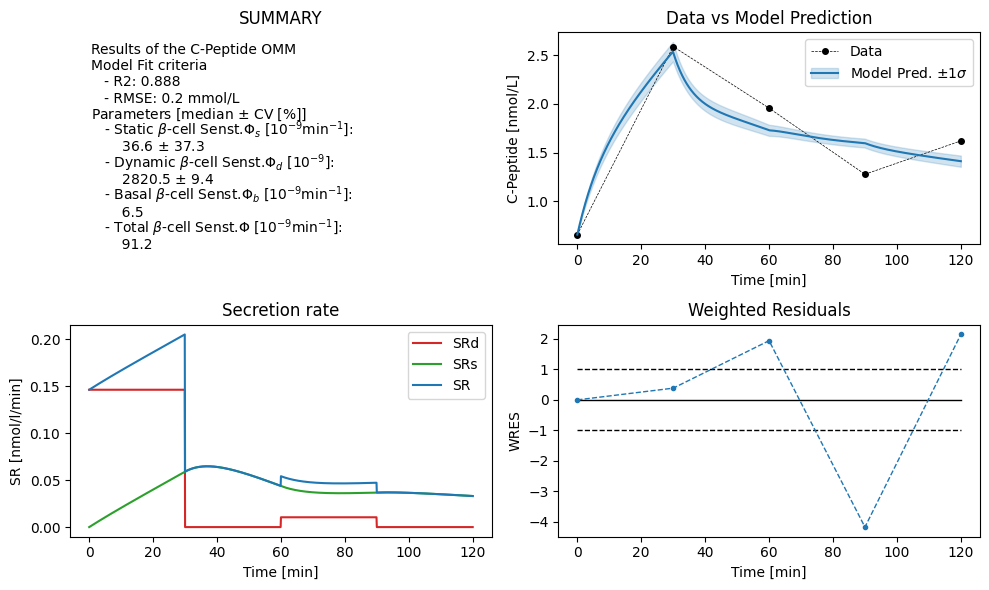

Model Inversion ...
DONE


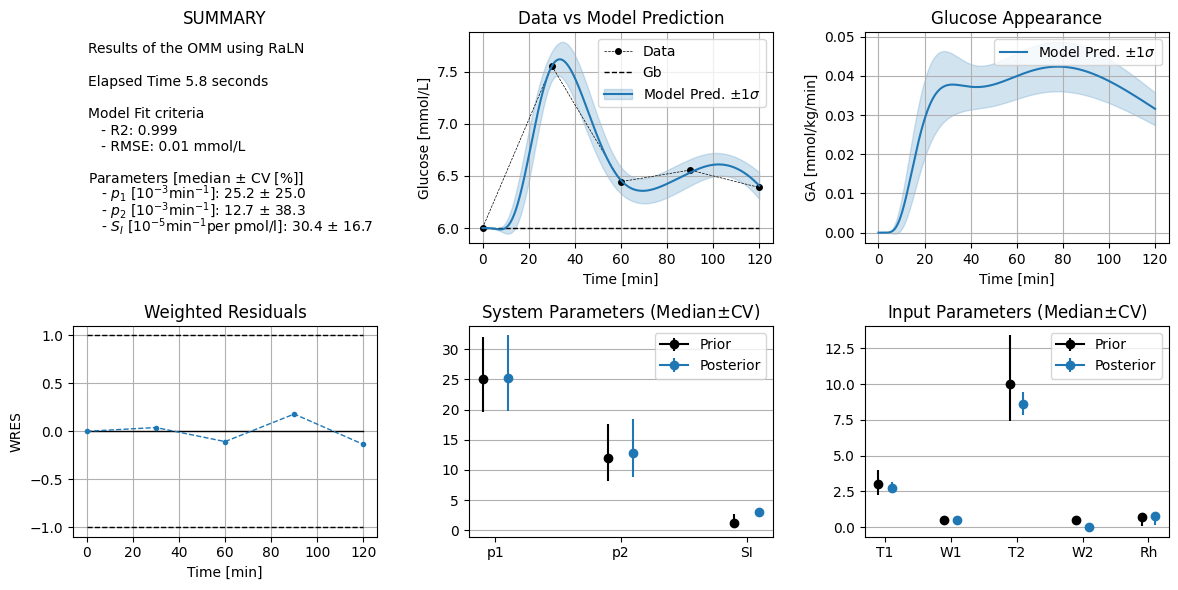

6_After
Model Inversion ...
DONE


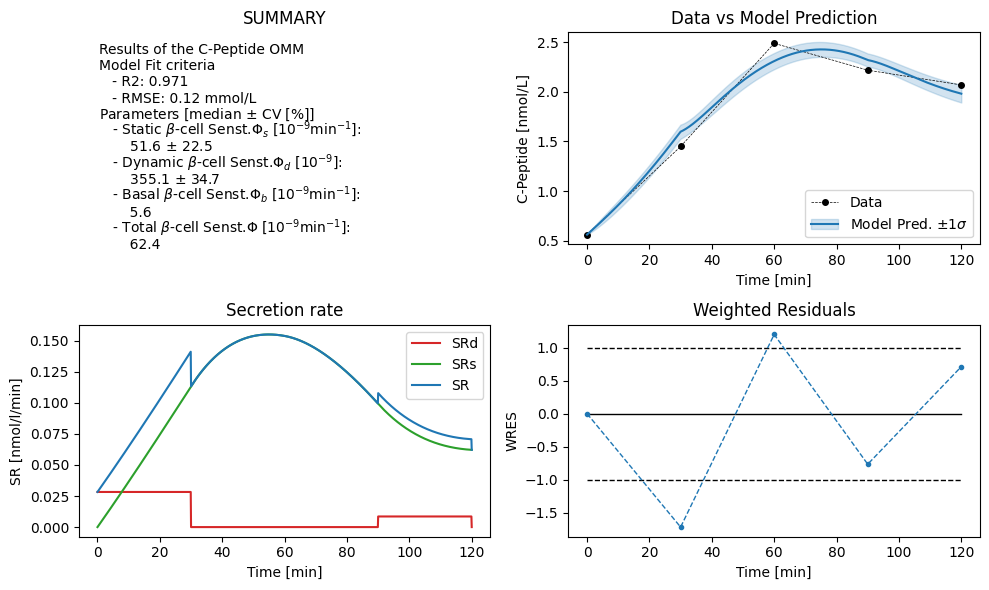

Model Inversion ...
DONE


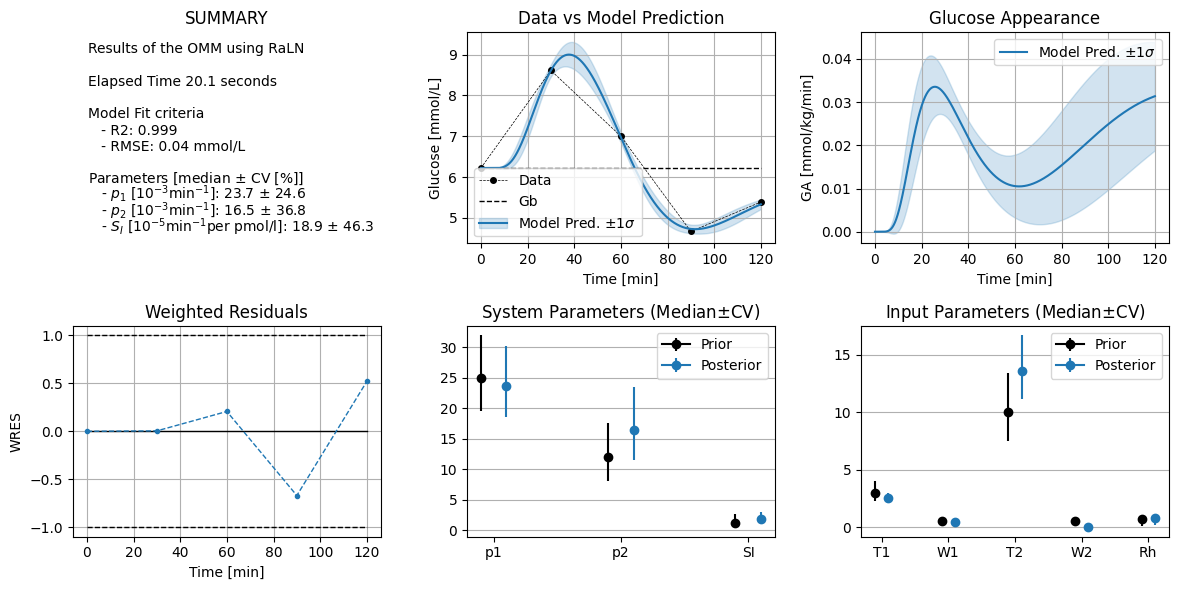

7_After
Model Inversion ...
DONE


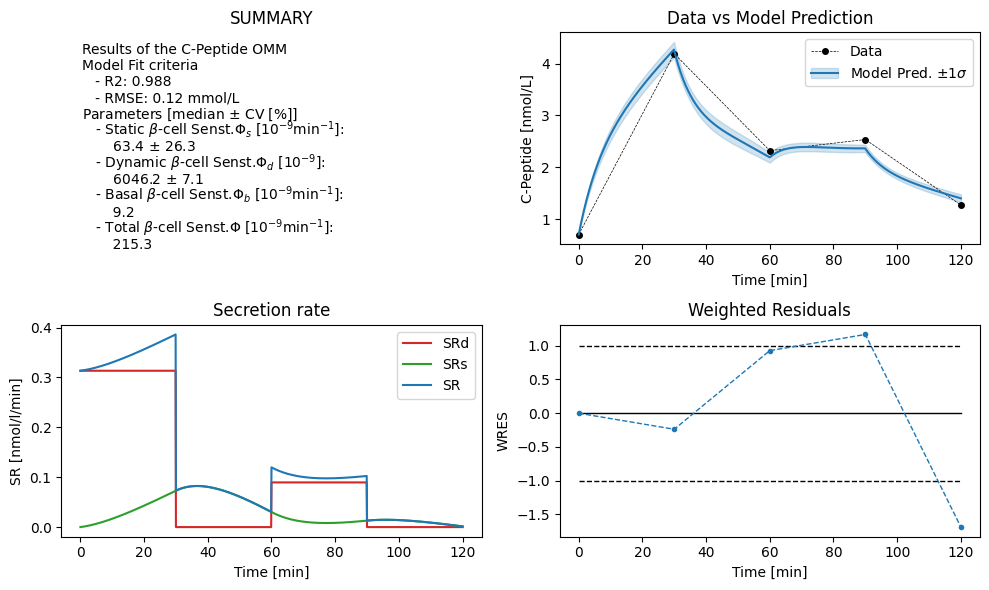

Model Inversion ...
DONE


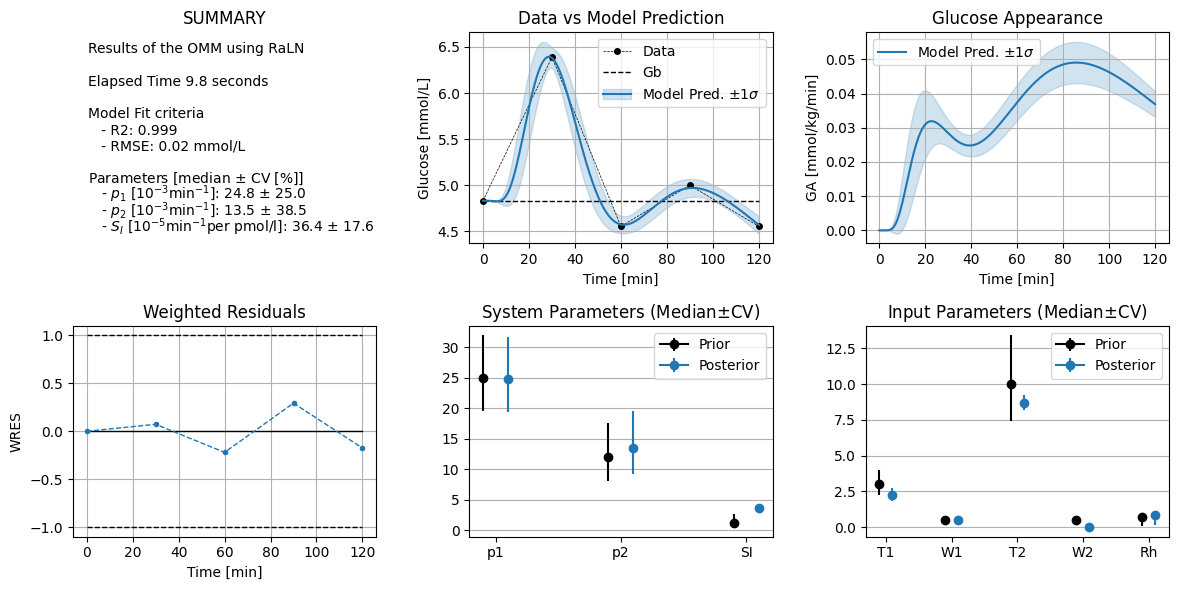

9_After
Model Inversion ...
DONE


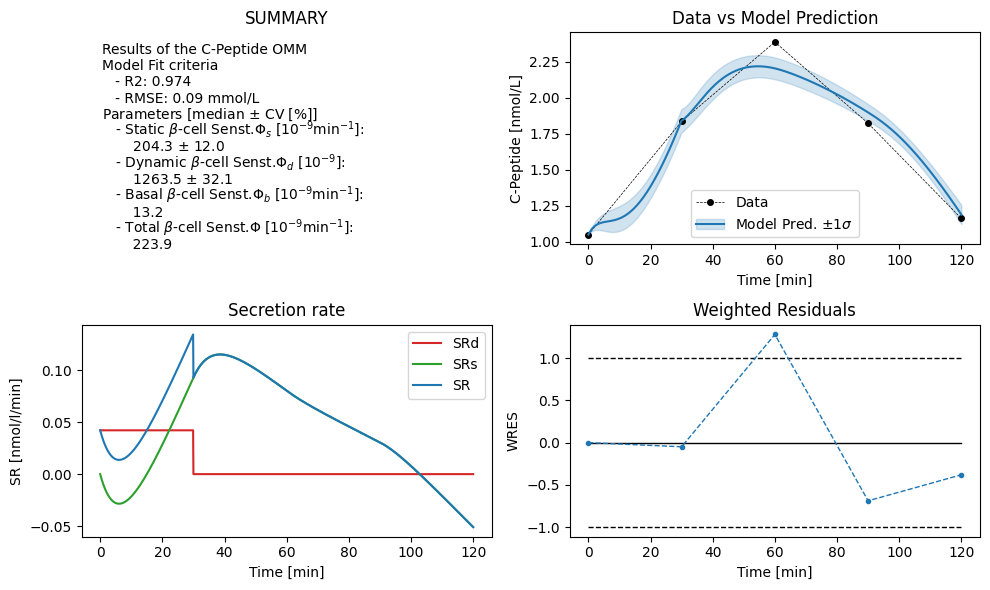

Model Inversion ...
DONE


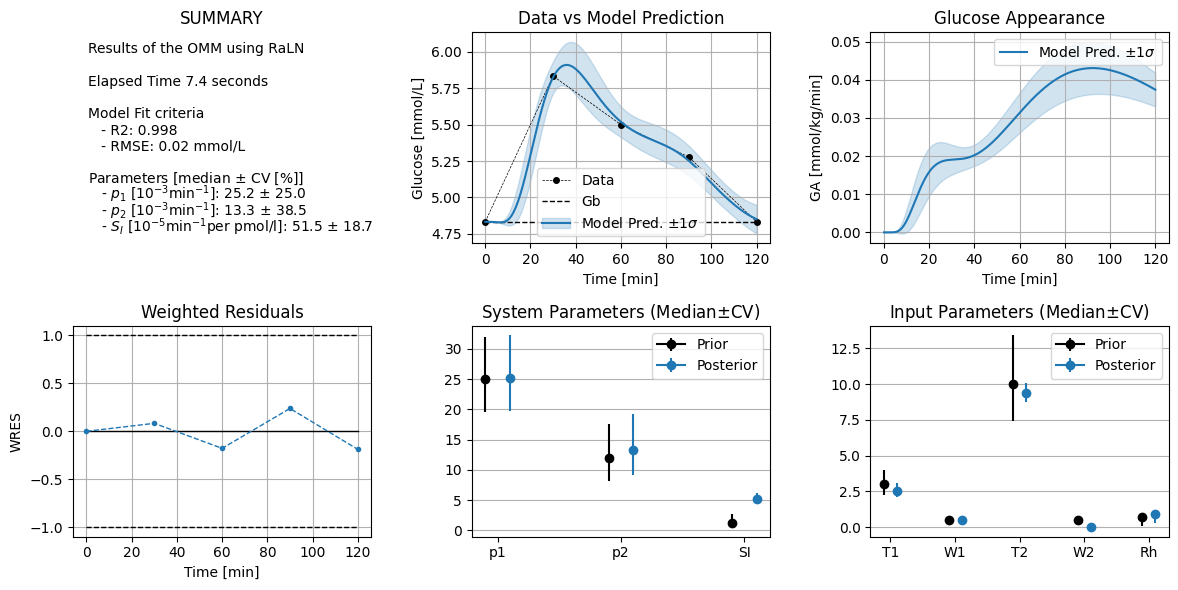

11_After
Model Inversion ...
DONE


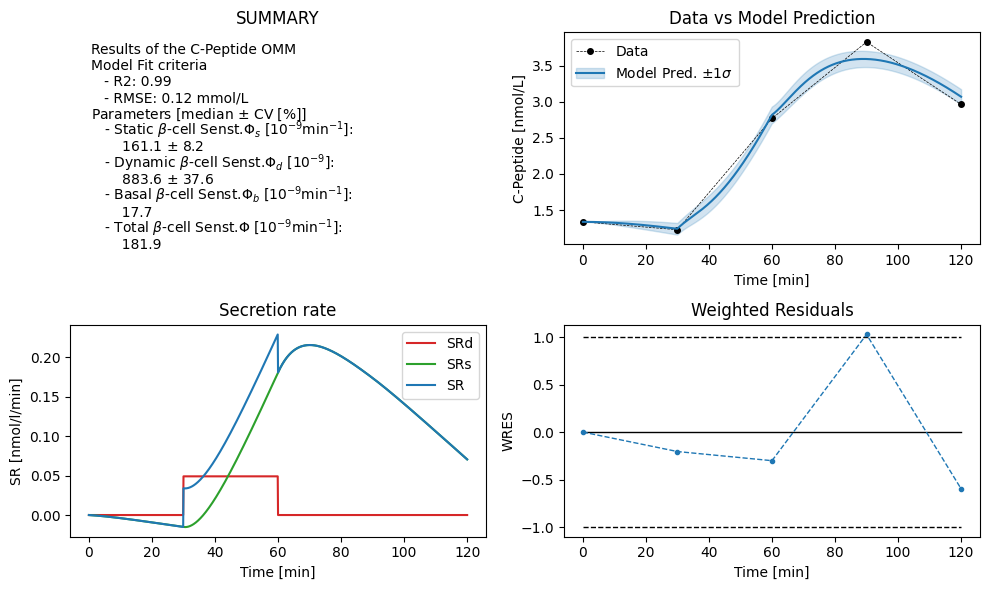

Model Inversion ...
DONE


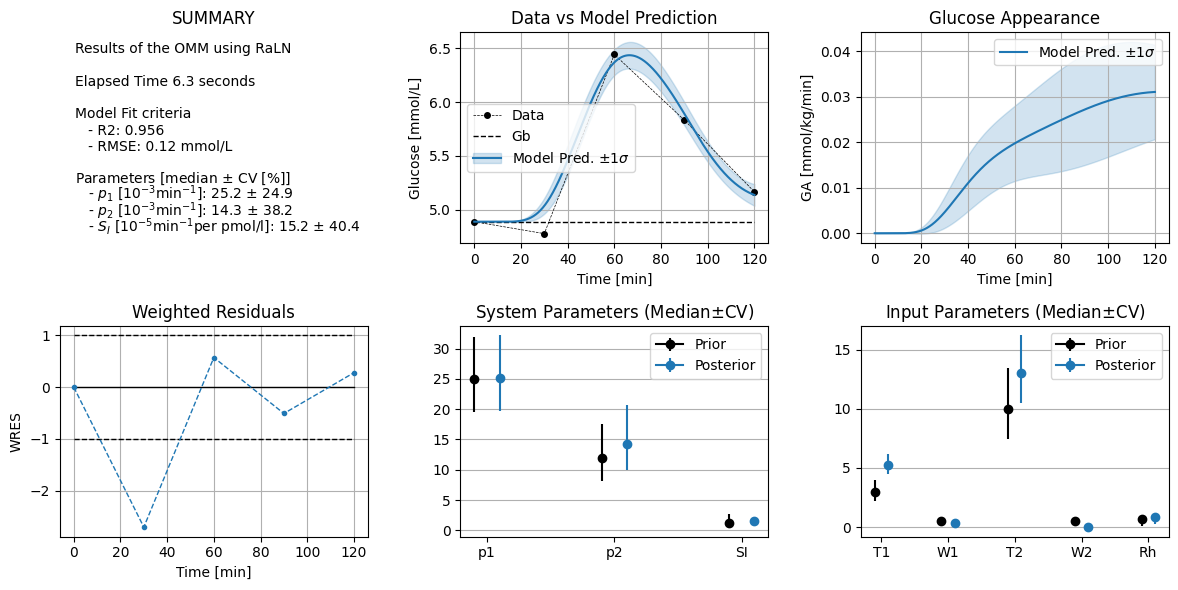

13_After
Model Inversion ...
DONE


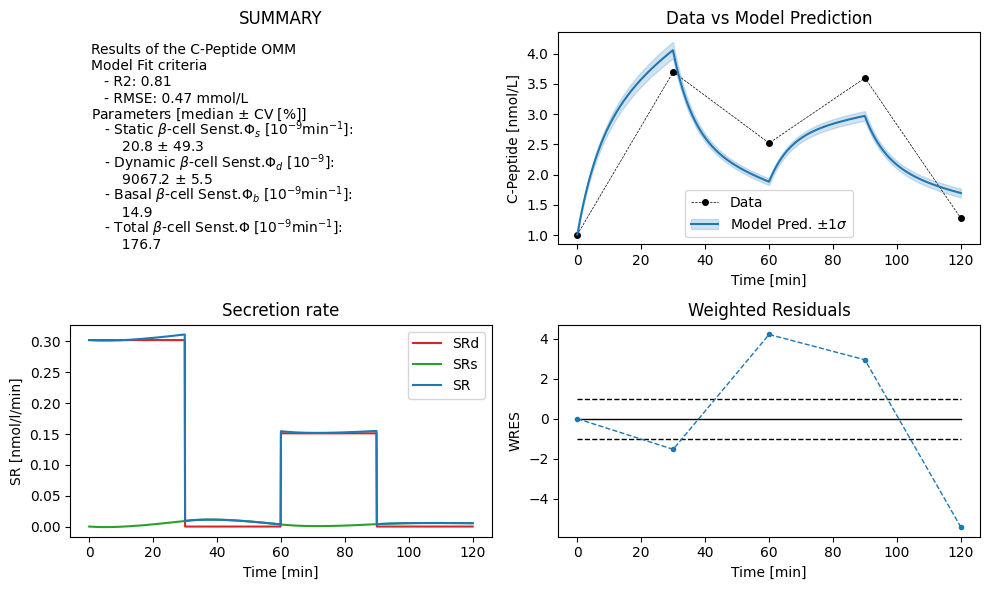

Model Inversion ...
DONE


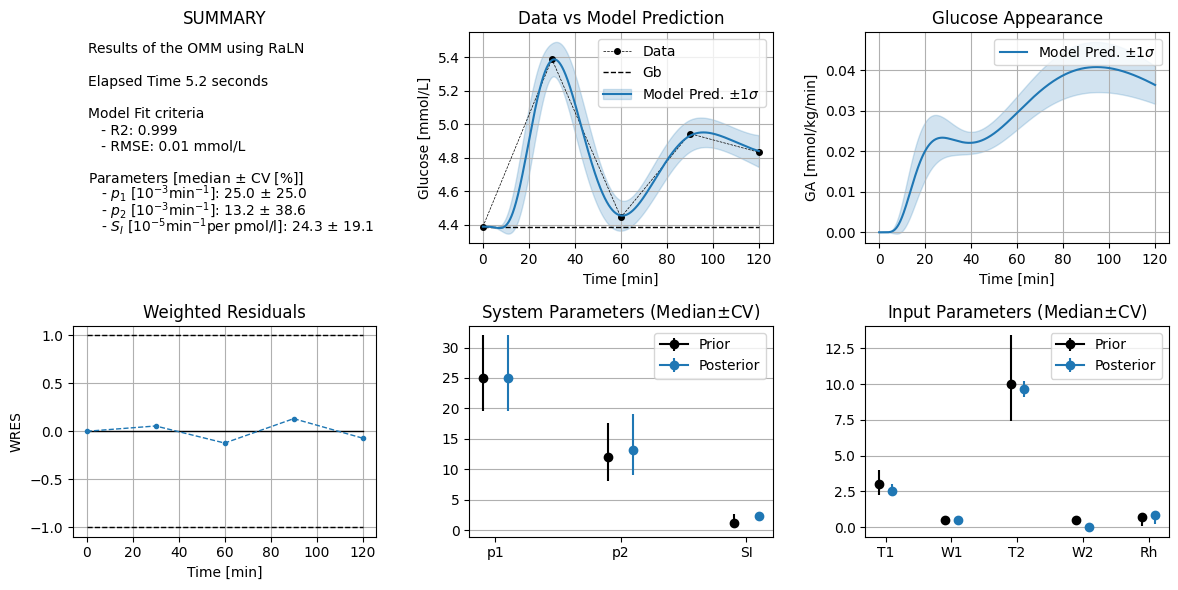

14_After
Model Inversion ...
DONE


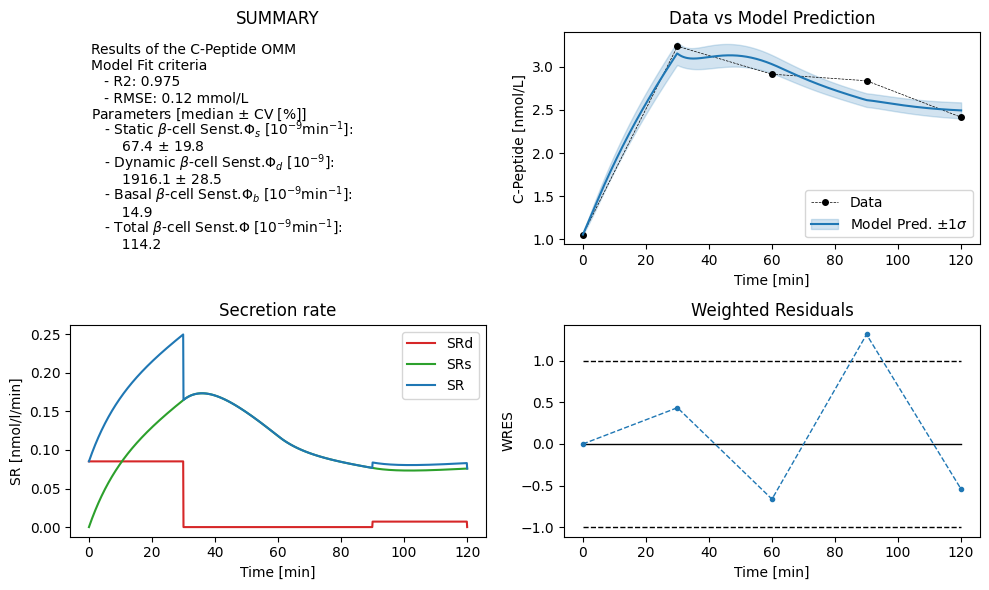

Model Inversion ...
DONE


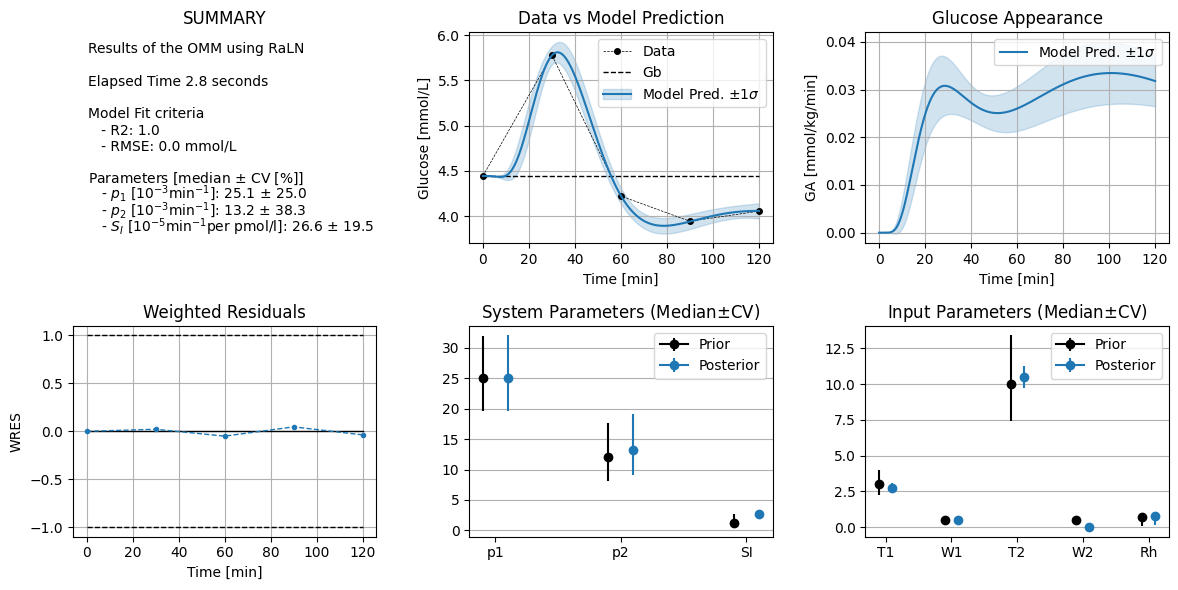

15_After
Model Inversion ...
DONE


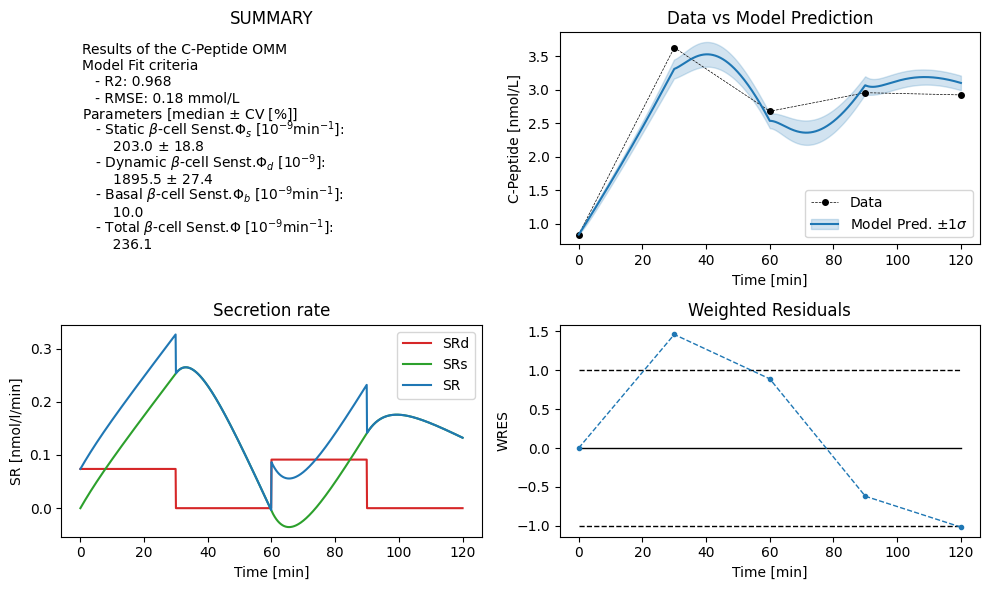

Model Inversion ...
DONE


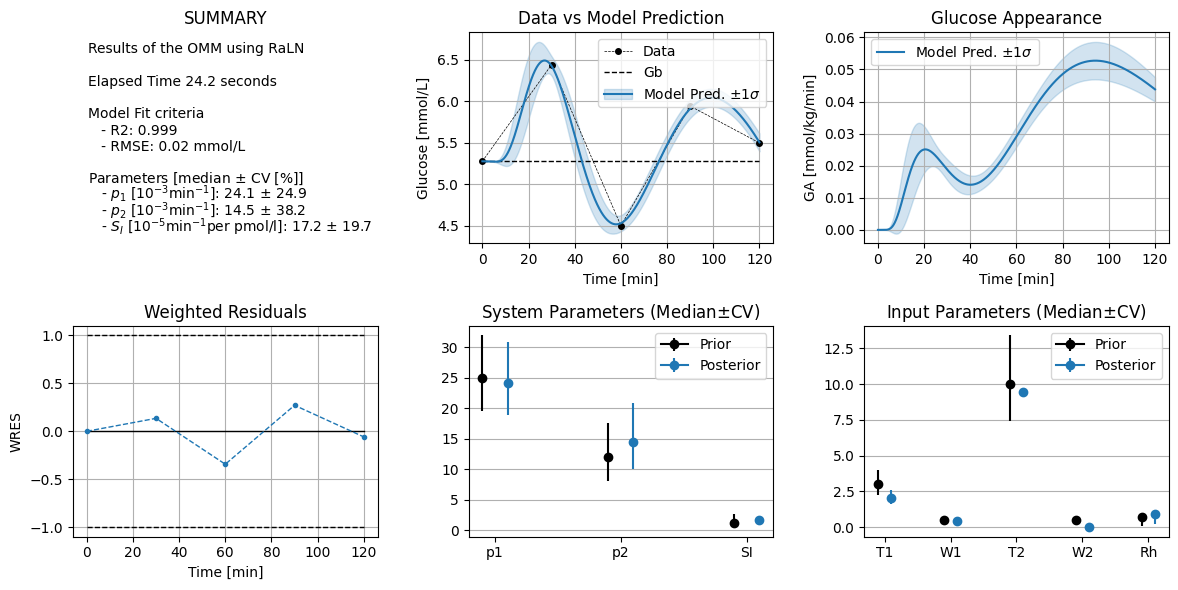

16_After
Model Inversion ...
DONE


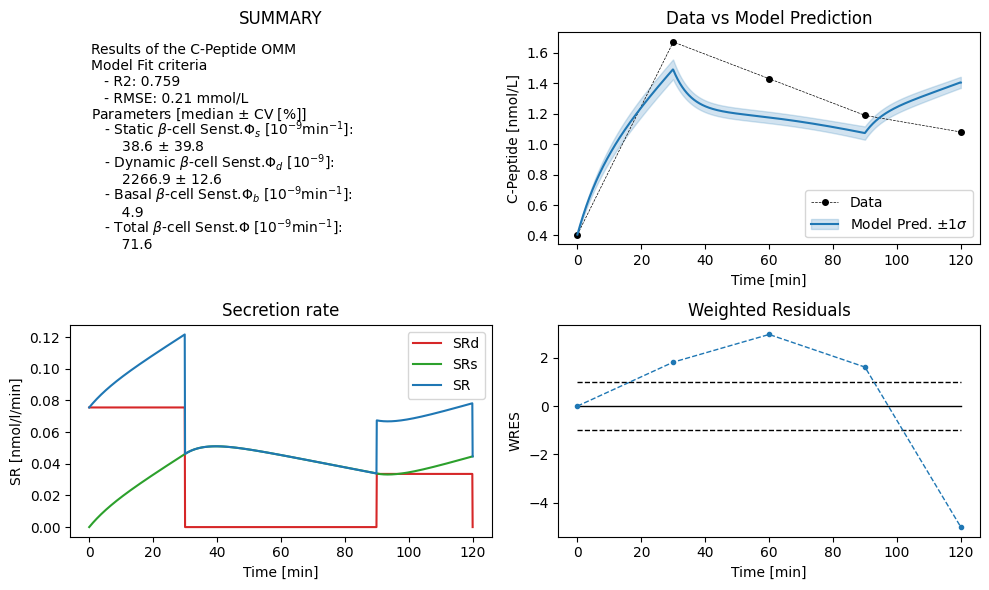

Model Inversion ...
DONE


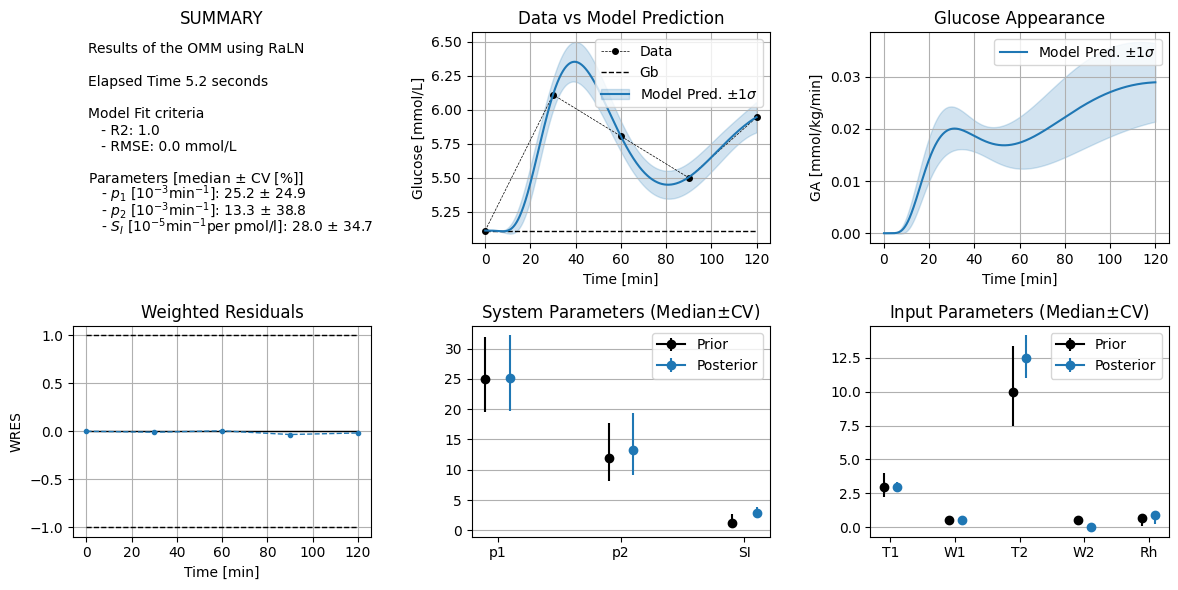

17_After
Model Inversion ...
DONE


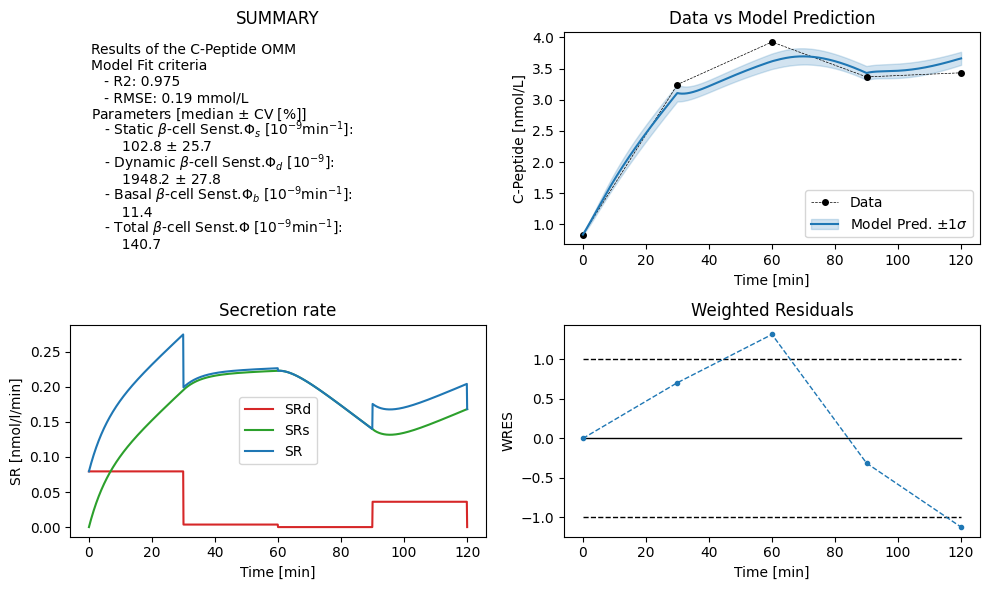

Model Inversion ...
DONE


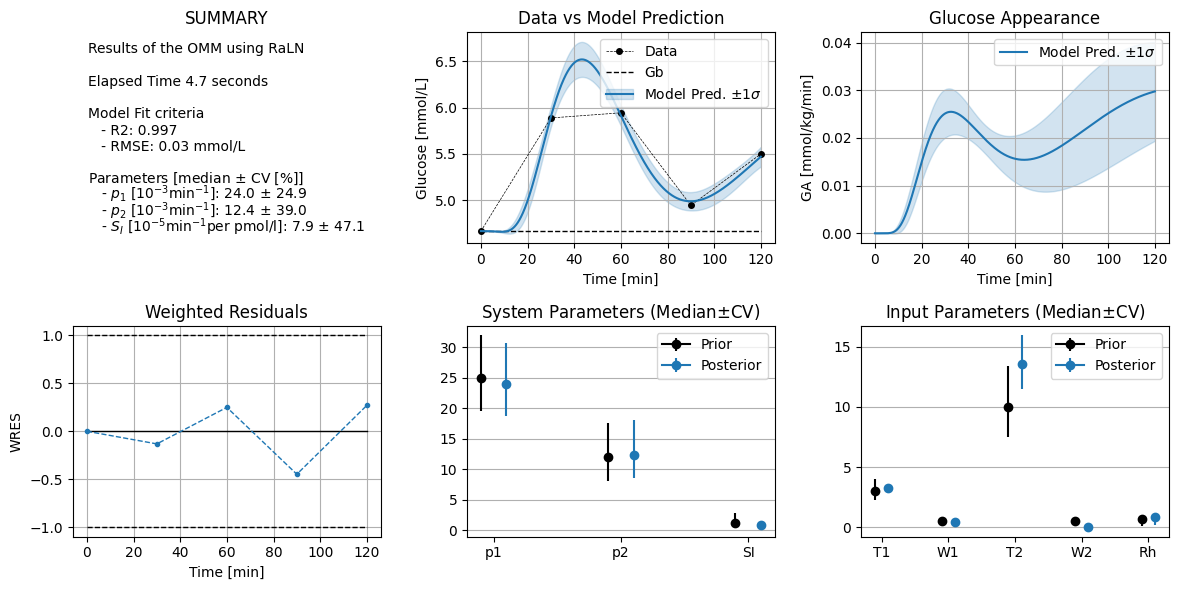

18_After
Model Inversion ...
DONE


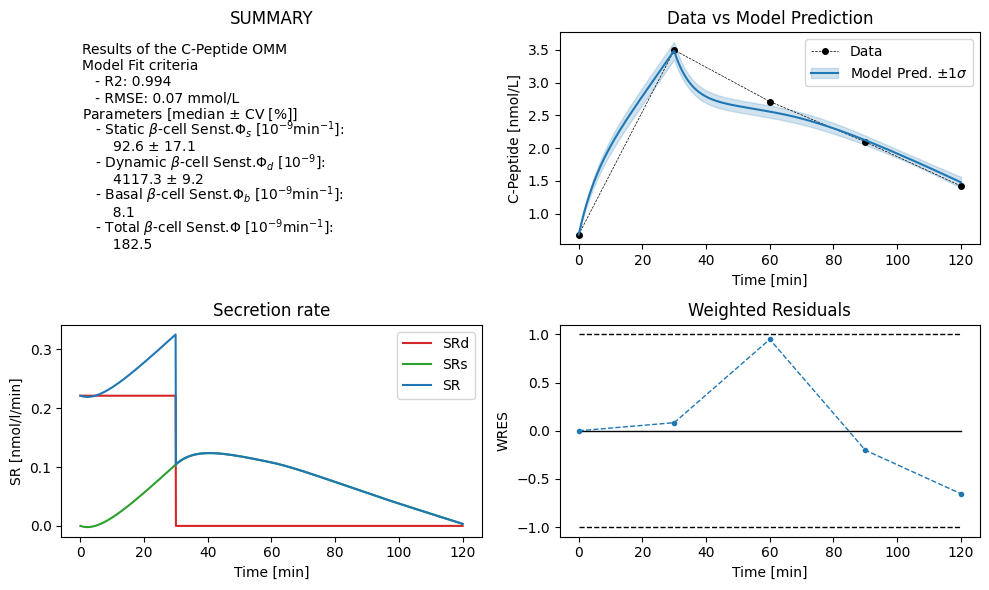

Model Inversion ...
DONE


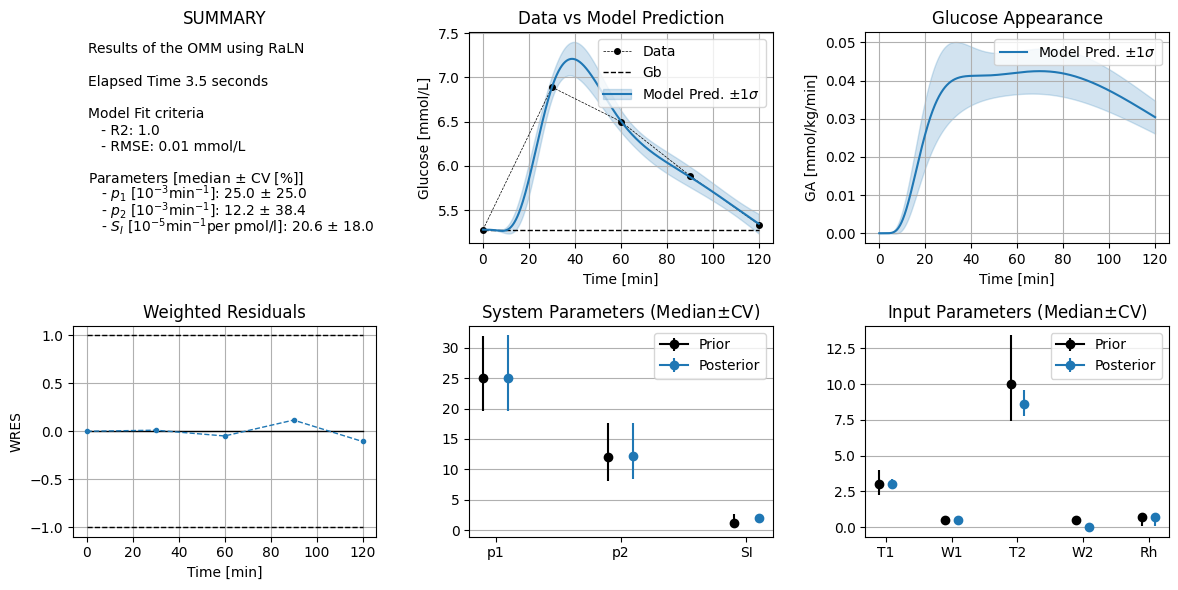

19_After
Model Inversion ...
DONE


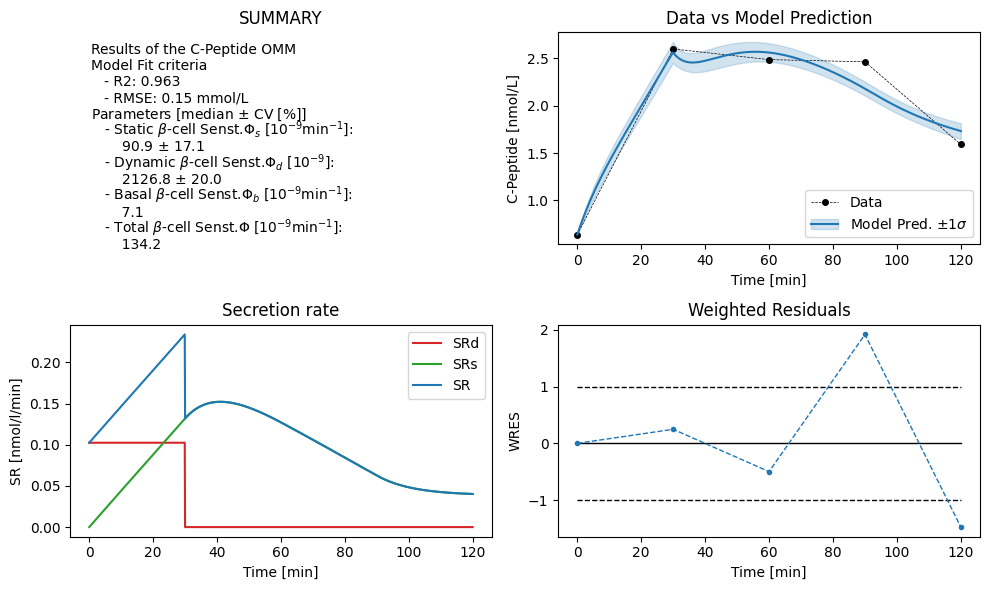

Model Inversion ...
DONE


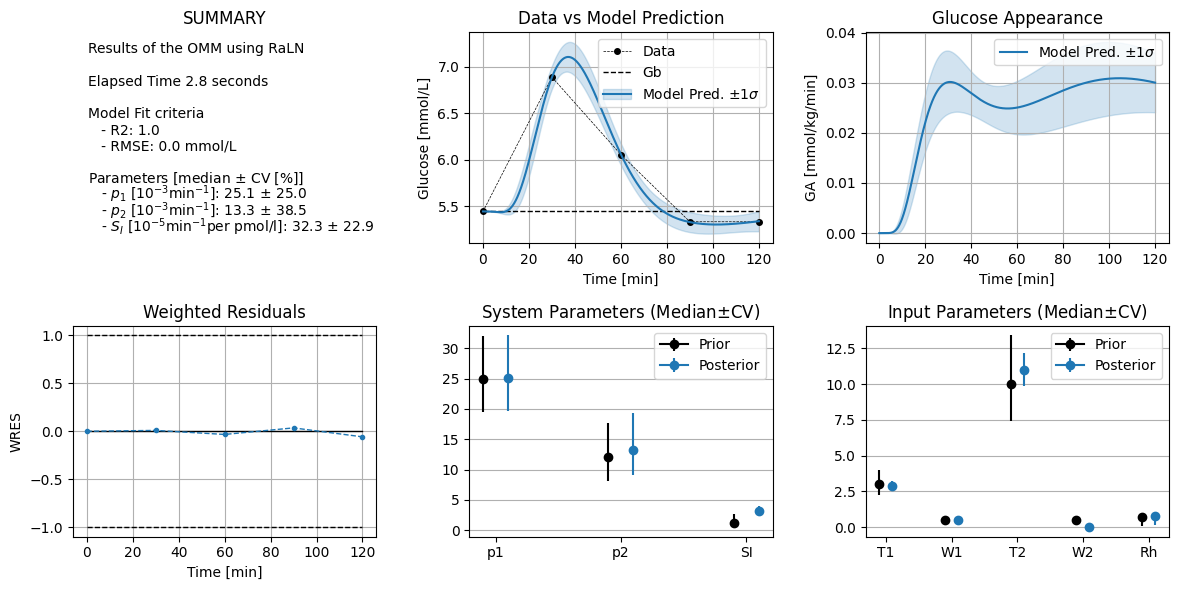

In [39]:
# Loop through the df and select one ID at a time to perform operations

# Define column names
columns = ['ID', 'PhiS_Median', 'PhiS_CV','PhiD_Median', 'PhiD_CV',
           'PhiB', 'Phi','RMSE_CPEP', 'R2_CPEP', 'p1_Median', 'p1_CV',
           'p2_Median', 'p2_CV','SI_Median', 'SI_CV','RMSE_GLU', 'R2_GLU']

secretion_columns = ['Time','SR','SRs','SRd','ID']

# Create an empty DataFrame with column names
result = pd.DataFrame(columns=columns)
secretion = pd.DataFrame(columns=secretion_columns)

for pid in df['ID'].unique():
  # Select rows for the current ID
  current_df = df[df['ID'] == pid]
  current_df2 = df2[df2['ID'] == pid]
  # Perform operations on the current_df
  import numpy as np
  import VBA_OMM
  import pandas as pd

  ##Get the individual data

  t = current_df["Time [min]"].to_numpy()
  G = current_df["Glucose [mmol/L]"].to_numpy()
  CP = current_df["C-Peptide [nmol/L]"].to_numpy()

  # Construt the data struture
  dat = {"t": t.reshape(len(t),1),
        "G": G.reshape(len(t),1),
        "CP": CP.reshape(len(t),1)}

  # Constants
  const = {"dt": 0.1,
          "measCV": 6,
          "age": current_df2.iloc[0,2],
          "subject_type": current_df2.iloc[0,4],
          "CPb": dat["CP"][0, 0],
          "Gb": dat["G"][0, 0]}

  # Construct inversion options
  opt = {"displayWin": True,
        "updateMeasCV": False}

  # Priors [median CV]
  priors = {"T": np.array([10, 50]),                 # min
            "beta": np.array([20, 50]),              # 1E-9 1/min
            "h": np.array([dat["G"][0,0], 20]),      # mmol/l
            "kd": np.array([1000, 50])}              # 1E-9
  print(pid)
  out1 = VBA_OMM.mainCP(dat, priors, const, opt)




  t = current_df["Time [min]"].to_numpy()
  G = current_df["Glucose [mmol/L]"].to_numpy()
  I = current_df["Insulin [pmol/L]"].to_numpy()

  # Construt the data struture
  dat = {"t": t.reshape(len(t),1),
        "G": G.reshape(len(t),1),
        "I": I.reshape(len(t),1)}

  # Constants
  const = {"A": 6,                    # ??
          "V": 0.145,                # L/kg
          "dt": 0.1,                 # min
          "Rap": [],                 # mmol/kg/min
          "X0": 0,                   # 1/min
          "measCV": 2,               # %
          "Gb": dat["G"][0, 0],      # mmol/L
          "G0": dat["G"][0, 0],      # mmol/L
          "Ib": dat["I"][0, 0]}      # pmol/L

  # Construct inversion options
  opt = {"GA_fun": "RaLN",
        "tb": np.array([0, 30, 60, 90, 120]),      # min
        "alpha": 0.017,                                          # 1/min
        "displayWin": True}

  # Priors
      # - System Parameters [median CV]
  priors = {"p1": np.array([0.025, 25]),      # 1/min
            "p2": np.array([0.012, 40]),      # 1/min
            "SI": np.array([12E-5, 100])}     # 1/min per pmol/L

      # - Input function Parameters
  if opt["GA_fun"] == 'RaPL':
      priors.update({"k": np.array([[3.2E-3*const["A"], 50],          # mmol/kg/min
                                    [7.3E-3*const["A"], 50],          # mmol/kg/min
                                    [5.4E-3*const["A"], 50],          # mmol/kg/min
                                    [5.1E-3*const["A"], 50],          # mmol/kg/min
                                    [3.7E-3*const["A"], 50],          # mmol/kg/min
                                    [1.8E-3*const["A"], 50]])})       # mmol/kg/min
  if opt["GA_fun"] == 'RaLN':
      priors.update({"k": np.array([[30, 30],         # min
                                    [0.5, 30],
                                    [100, 30],        # min
                                    [0.5, 30],
                                    [0.7, 30]])})

  out2 = VBA_OMM.mainG(dat, priors, const, opt)

  ## C peptide model output
  parameters = out1['Model_Output']
  PhiS_Median = parameters['PhiS']
  PhiD_Median = parameters['PhiD']
  PhiB = parameters['PhiB']
  Phi = parameters['Phi']

  posterior = out1['posterior']

  PhiS_CV = posterior['beta'][1]
  PhiD_CV = posterior['kd'][1]


  Performance1 = out1['Performance']
  RMSE_CPEP = Performance1['RMSE']
  R2_CPEP = Performance1['R2']

  ## Glucose model output
  posterior = out2['posterior']
  p1_Median = posterior['p1'][0]
  p2_Median = posterior['p2'][0]
  SI_Median = posterior['SI'][0]

  p1_CV = posterior['p1'][1]
  p2_CV = posterior['p2'][1]
  SI_CV = posterior['SI'][1]

  Performance2 = out2['Performance']
  RMSE_GLU = Performance2['RMSE']
  R2_GLU = Performance2['R2']

  values = [pid,PhiS_Median,PhiS_CV,PhiD_Median, PhiD_CV, PhiB, Phi,
            RMSE_CPEP,R2_CPEP,
            p1_Median, p1_CV, p2_Median, p2_CV, SI_Median,SI_CV,
            RMSE_GLU,R2_GLU]

  df_new_row = pd.DataFrame([values], columns=columns)
  result = pd.concat([result, df_new_row], ignore_index=True)

  parameters = out1['Model_Output']
  SR = parameters['SR']
  SRs = parameters['SRs']
  SRd = parameters['SRd']
  t = parameters['t']

  df_new_row = pd.DataFrame({'Time': t.flatten(), 'SR': SR, 'SRs': SRs, 'SRd': SRd,'ID':pid})
  secretion = pd.concat([secretion, df_new_row], ignore_index=True)


In [40]:
# save the result dataframe as a csv file

result.to_csv('min_mod_result.csv', index=False)
secretion.to_csv('min_mod_secretion.csv', index=False)
